In [148]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.datasets import fetch_olivetti_faces
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

import numpy as np
import matplotlib.pyplot as plt
import os

In [73]:
path = os.path.join("vizdoom_dataset")
states = np.load(path+"\\states0.npy", allow_pickle=True)
actions = np.load(path+"\\actions0.npy", allow_pickle=True)

In [95]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(states, actions):
    strat_train_x = states[train_index]
    strat_train_y = actions[train_index]
    strat_test_x = states[test_index]
    strat_test_y = actions[test_index]

In [96]:
print(strat_train_x.shape)
print(strat_test_x.shape)

(329, 64, 64, 4)
(83, 64, 64, 4)


In [97]:
print(strat_train_y)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 1 0]]


In [98]:
print(np.unique(strat_train_y, axis=0))
print(np.unique(strat_train_y, axis=0, return_counts=True)[1] / len(strat_train_y))

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1]
 [0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 1]
 [0 0 0 1 0 1 0]
 [0 0 1 0 0 0 0]
 [0 0 1 0 0 0 1]
 [0 0 1 0 0 1 0]
 [0 0 1 1 0 0 0]
 [0 0 1 1 0 0 1]]
[0.24620061 0.03951368 0.06079027 0.36778116 0.05167173 0.03951368
 0.12462006 0.01519757 0.03039514 0.01823708 0.00607903]


In [99]:
print(np.unique(strat_test_y, axis=0))
print(np.unique(strat_test_y, axis=0, return_counts=True)[1] / len(strat_test_y))

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1]
 [0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 1]
 [0 0 0 1 0 1 0]
 [0 0 1 0 0 0 0]
 [0 0 1 0 0 0 1]
 [0 0 1 0 0 1 0]
 [0 0 1 1 0 0 0]
 [0 0 1 1 0 0 1]]
[0.25301205 0.03614458 0.06024096 0.36144578 0.06024096 0.04819277
 0.12048193 0.01204819 0.02409639 0.01204819 0.01204819]


In [100]:
tsne = TSNE()
tsneified = tsne.fit_transform(states.reshape(states.shape[0], -1))

In [101]:
print(states.reshape(states.shape[0], -1).shape)

(412, 16384)


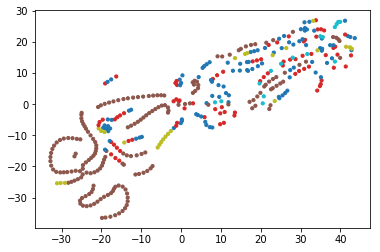

In [102]:
plt.scatter(tsneified[:, 0], tsneified[:, 1], c=[np.argmax(x) for x in actions], s=10, cmap="tab10")
plt.show()

In [103]:
doom_train_tsne = tsne.fit_transform(strat_train_x.reshape(strat_train_x.shape[0], -1))
print(strat_train_x.reshape(strat_train_x.shape[0], -1).shape)

(329, 16384)


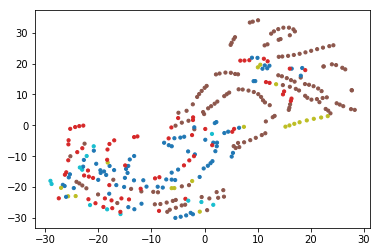

In [104]:
plt.scatter(doom_train_tsne[:, 0], doom_train_tsne[:, 1], c=[np.argmax(x) for x in strat_train_y], s=10, cmap="tab10")
plt.show()

In [105]:
dataset = fetch_olivetti_faces()

In [106]:
print(dataset["target"])

[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21
 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26
 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28
 28 28 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30 30 30 31 31
 31 31 31 31 31 31 31 31 32 32 32 32 32 32 32 32 32

In [107]:
data_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

for train_index, other_index in data_split.split(dataset["data"], dataset["target"]):
    strat_face_train_x = dataset["data"][train_index]
    strat_face_train_y = dataset["target"][train_index]
    strat_other_x = dataset["data"][other_index]
    strat_other_y = dataset["target"][other_index]

In [108]:
print(strat_other_y.shape)

(120,)


In [109]:
valid_split = StratifiedShuffleSplit(n_splits=1, test_size=0.4, random_state=42)

for test_index, valid_index in valid_split.split(strat_other_x, strat_other_y):
    strat_face_test_x = strat_other_x[test_index]
    strat_face_test_y = strat_other_y[test_index]
    strat_face_valid_x = strat_other_x[valid_index]
    strat_face_valid_y = strat_other_y[valid_index]

In [110]:
print(strat_face_valid_y.shape)

(48,)


In [111]:
face_tsne = tsne.fit_transform(strat_face_train_x.reshape(strat_face_train_x.shape[0], -1))
print(strat_face_train_x.reshape(strat_face_train_x.shape[0], -1).shape)

(280, 4096)


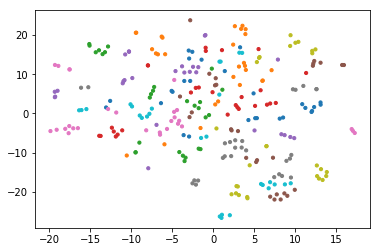

In [112]:
plt.scatter(face_tsne[:, 0], face_tsne[:, 1], c=strat_face_train_y, s=10, cmap="tab10")
plt.show()

In [113]:
print(strat_face_train_x)
cluster_x = KMeans(n_clusters=50).fit(strat_face_train_x)

[[0.58677685 0.70247936 0.73140496 ... 0.1983471  0.24380165 0.25619835]
 [0.1694215  0.2644628  0.21900827 ... 0.2107438  0.23553719 0.21487603]
 [0.25619835 0.2644628  0.2603306  ... 0.09090909 0.11157025 0.11570248]
 ...
 [0.1694215  0.29338843 0.56198347 ... 0.3429752  0.36363637 0.37603307]
 [0.5785124  0.60330576 0.6322314  ... 0.17768595 0.16115703 0.15289256]
 [0.25619835 0.2231405  0.28099173 ... 0.3181818  0.30165288 0.28512397]]


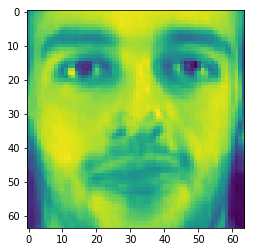

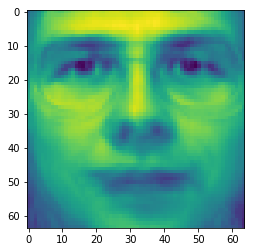

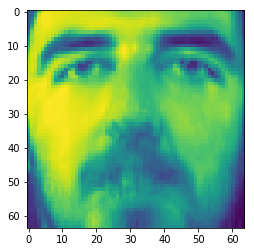

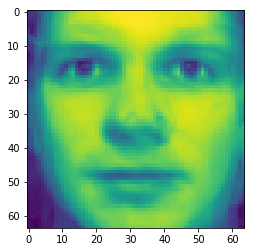

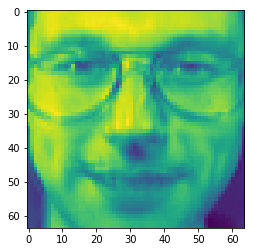

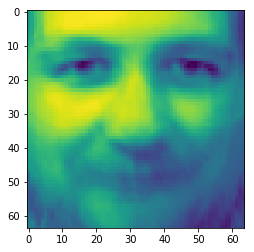

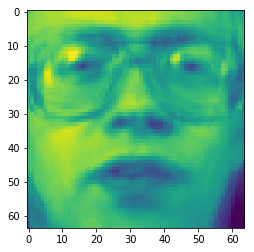

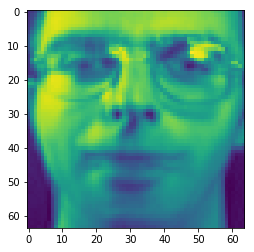

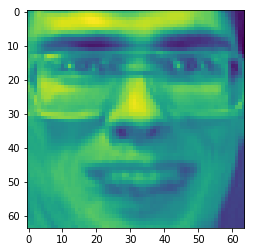

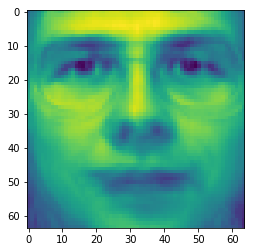

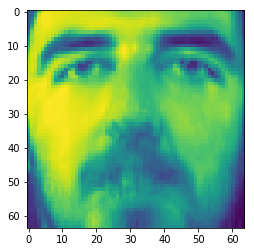

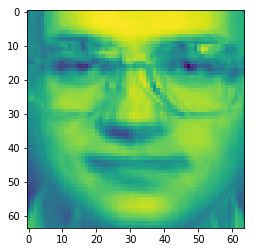

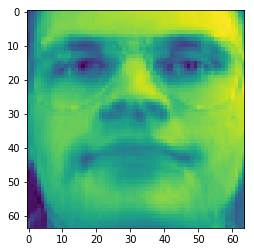

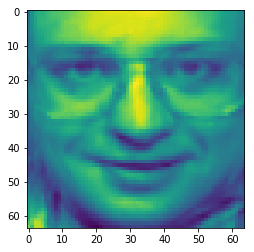

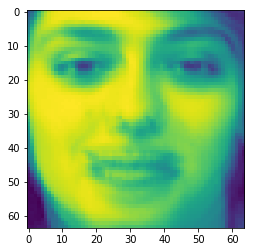

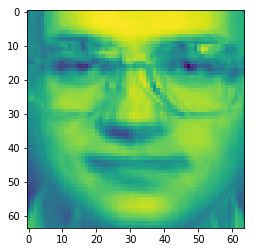

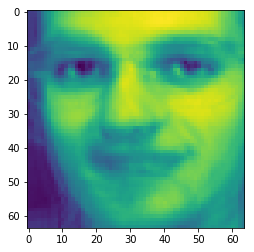

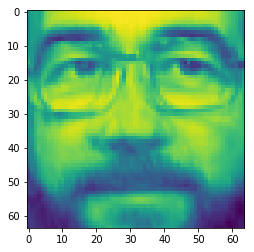

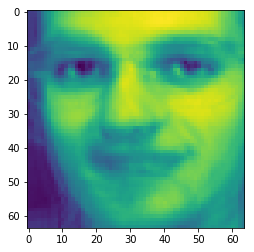

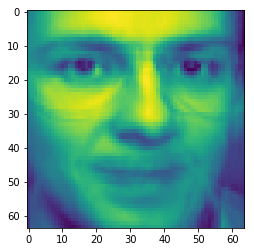

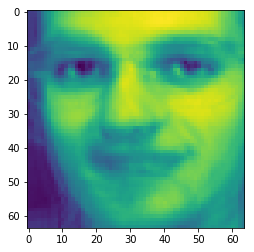

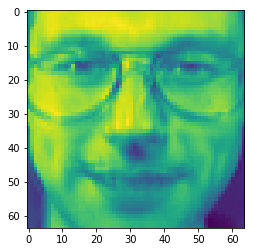

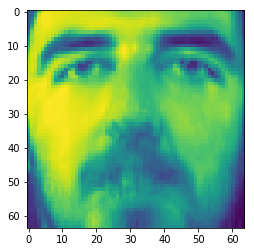

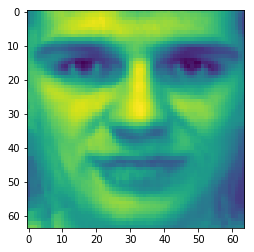

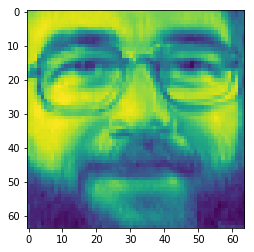

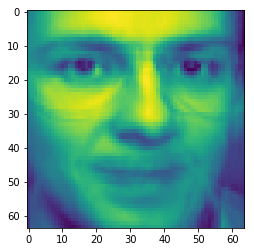

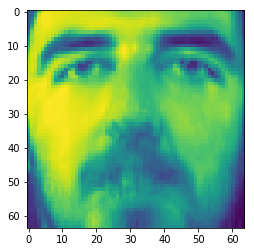

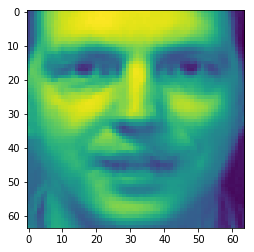

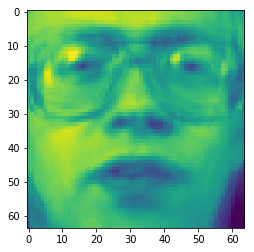

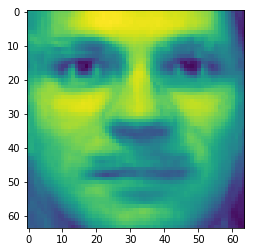

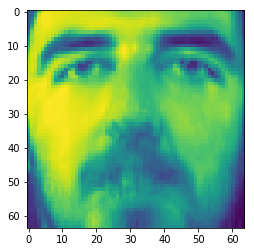

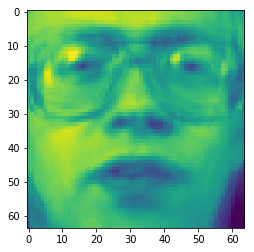

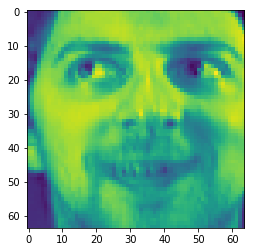

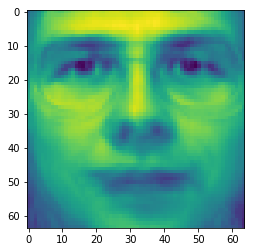

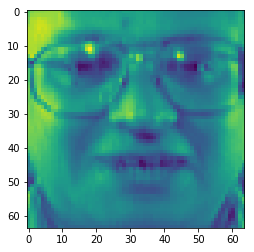

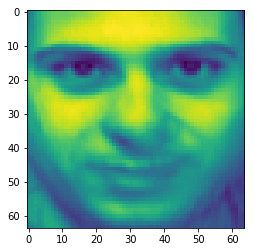

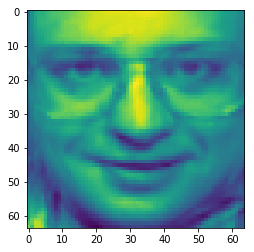

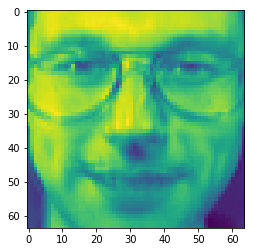

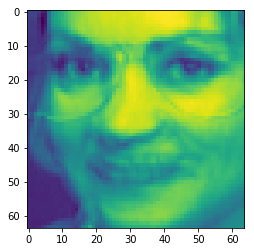

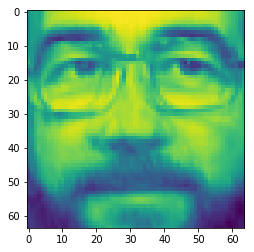

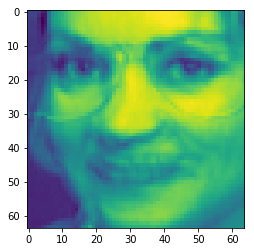

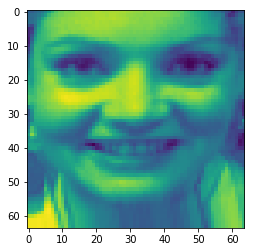

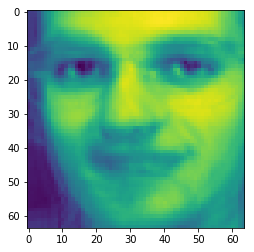

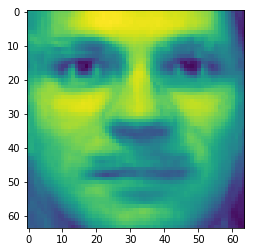

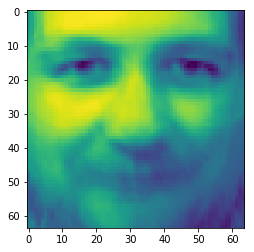

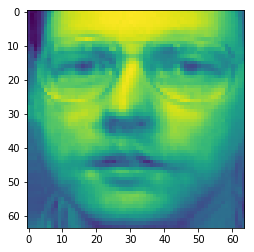

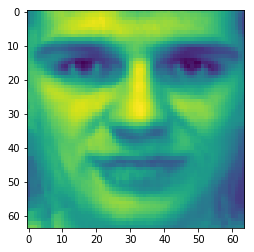

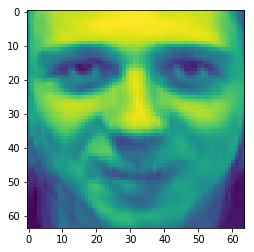

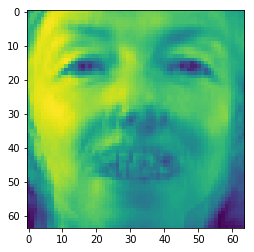

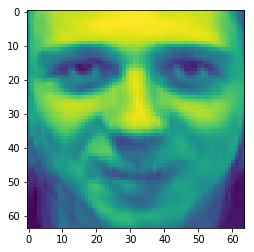

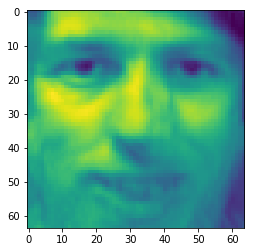

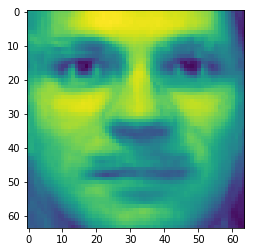

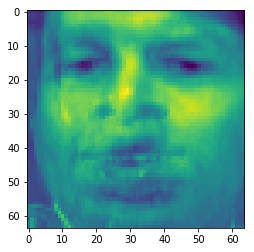

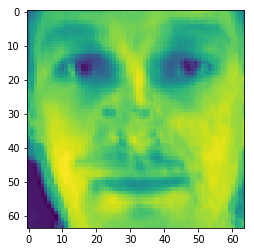

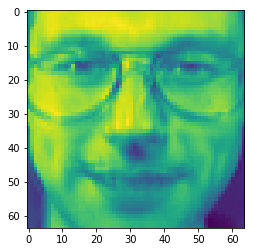

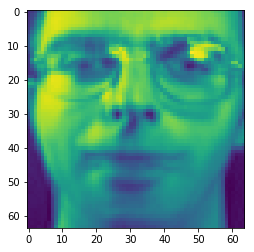

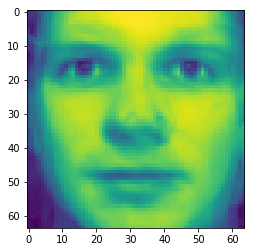

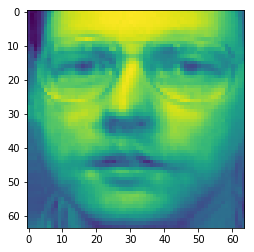

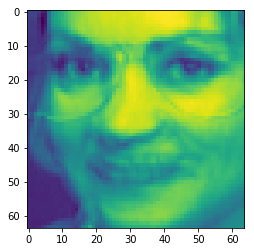

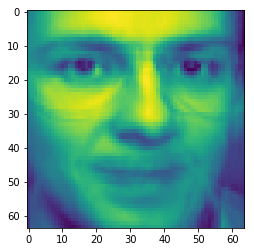

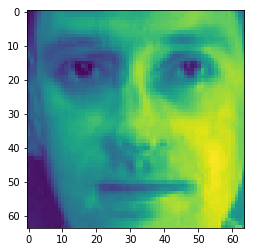

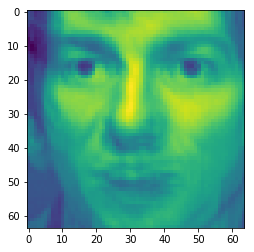

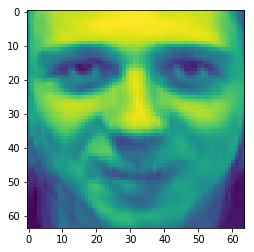

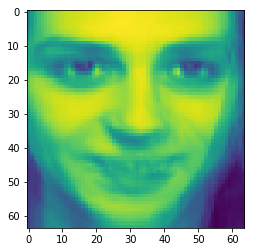

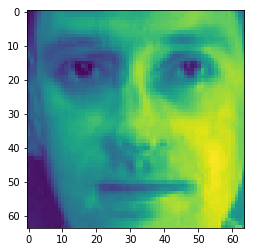

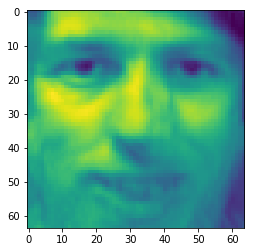

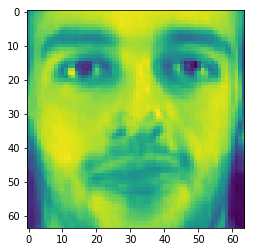

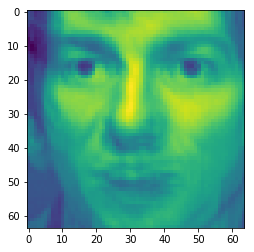

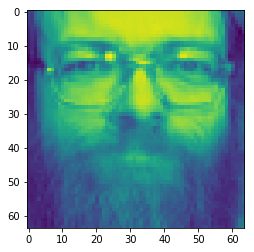

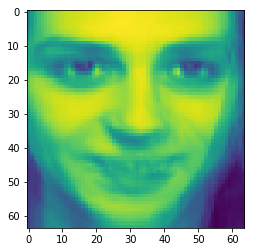

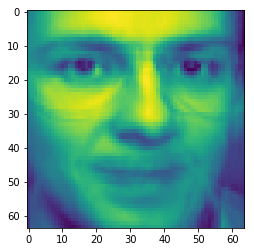

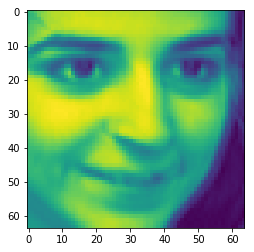

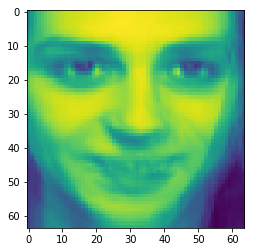

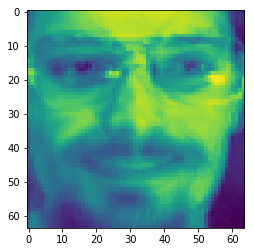

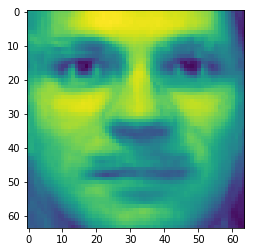

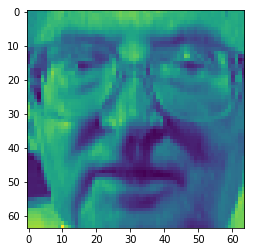

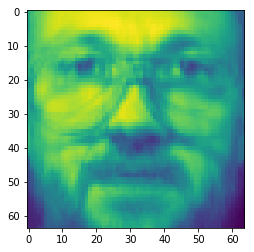

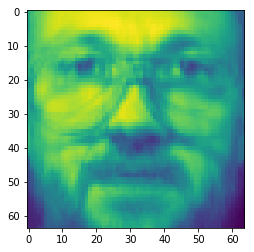

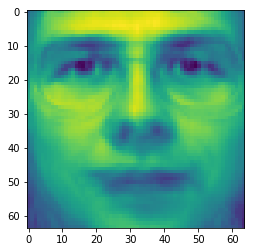

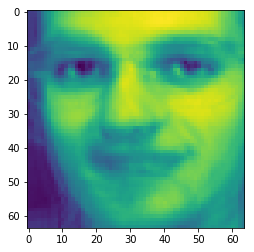

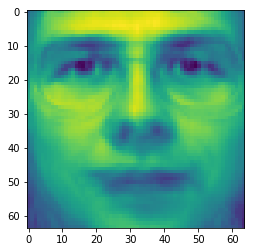

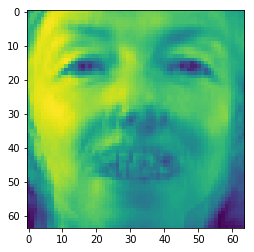

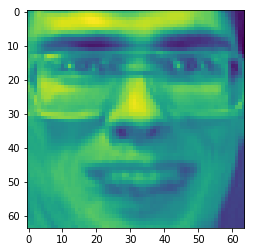

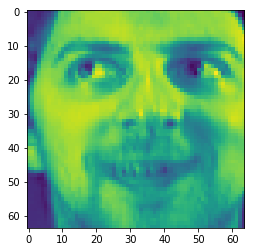

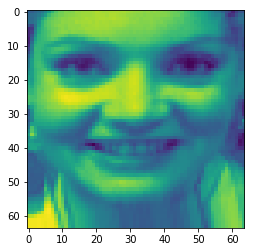

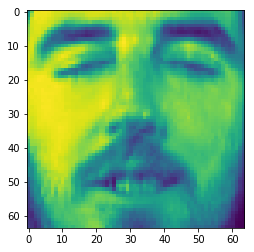

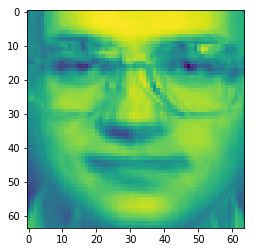

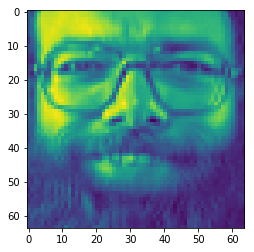

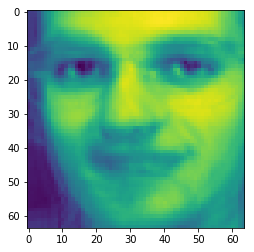

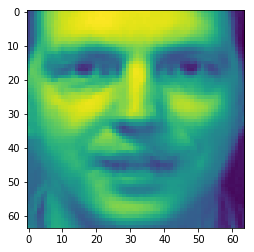

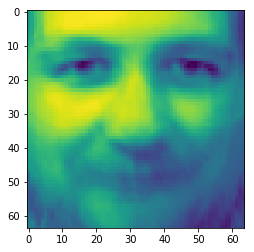

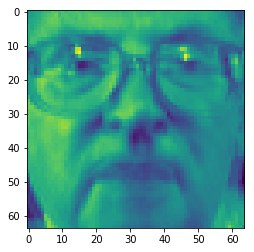

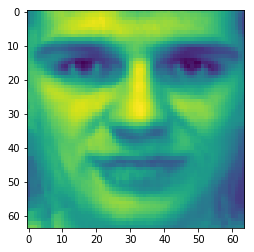

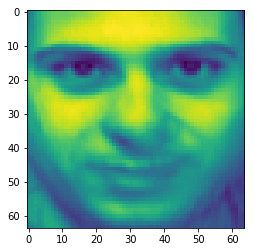

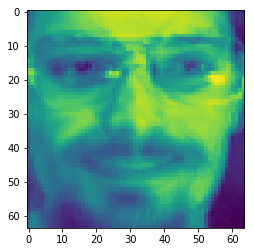

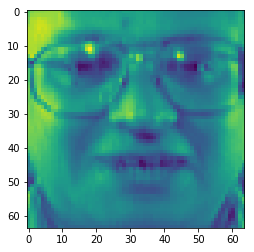

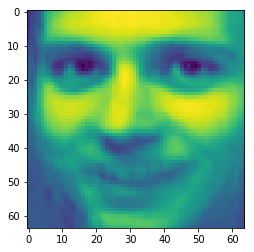

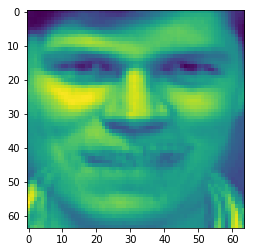

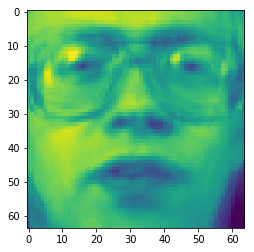

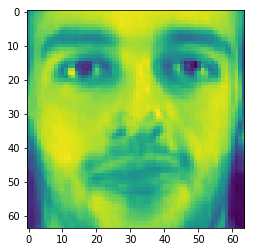

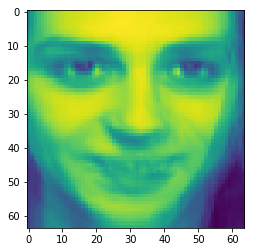

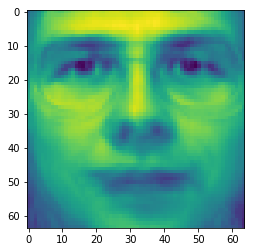

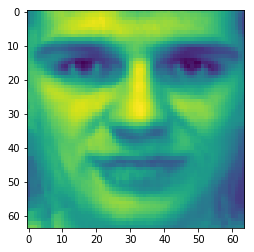

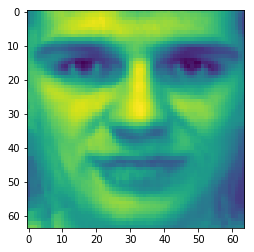

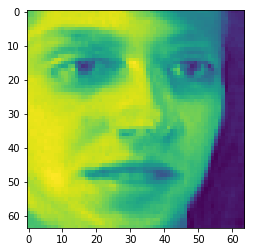

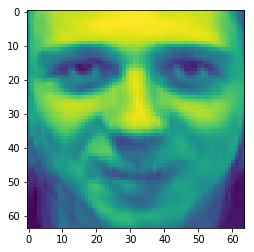

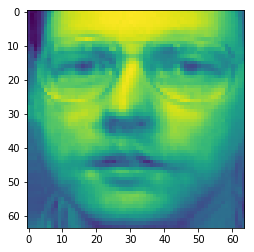

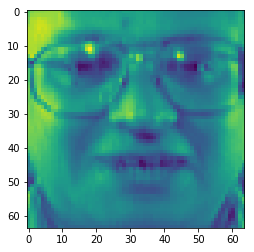

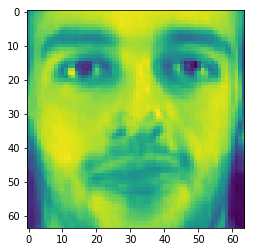

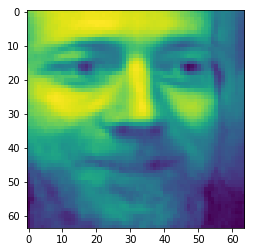

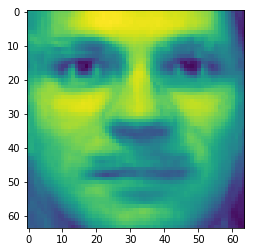

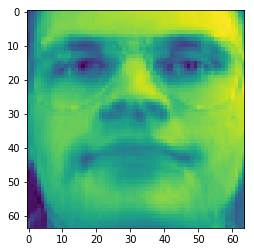

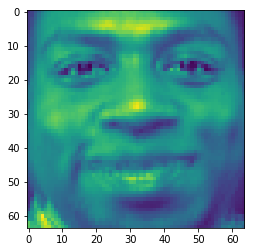

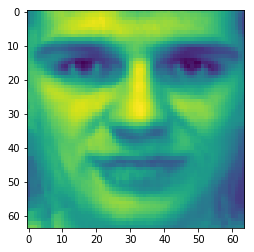

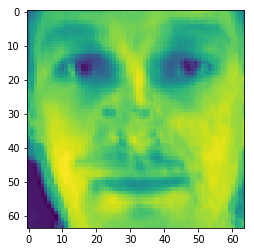

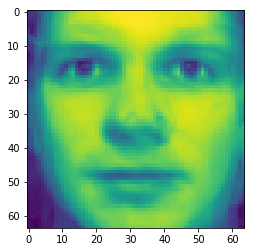

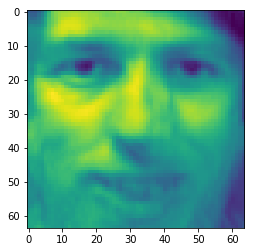

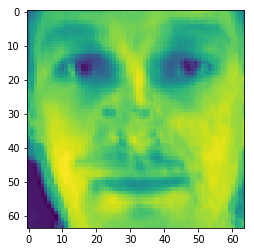

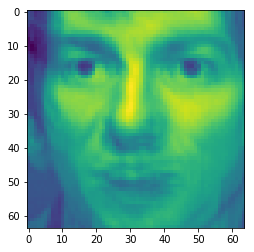

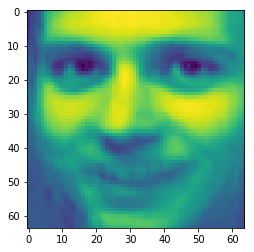

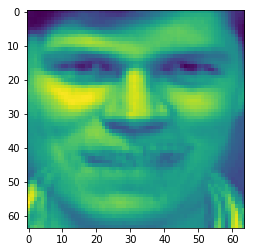

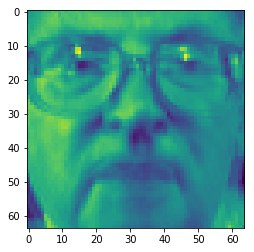

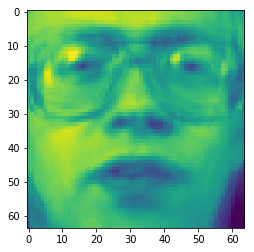

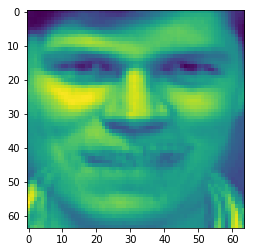

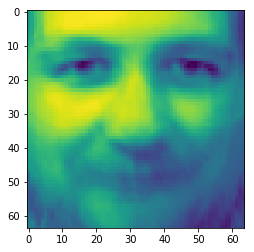

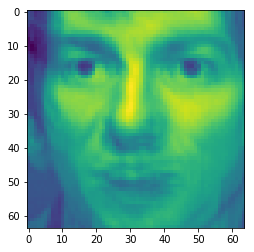

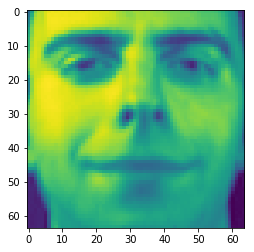

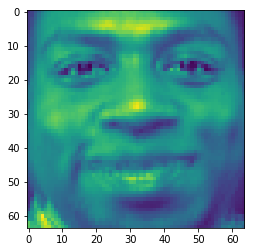

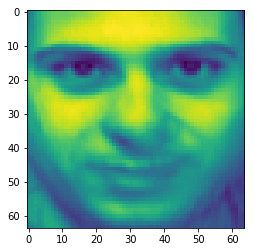

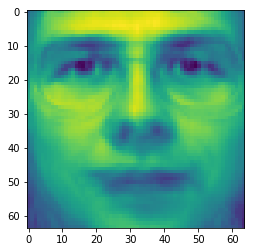

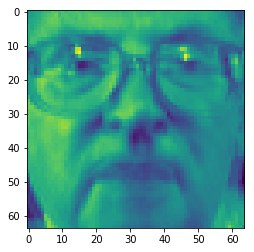

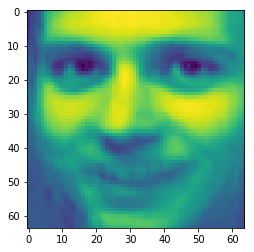

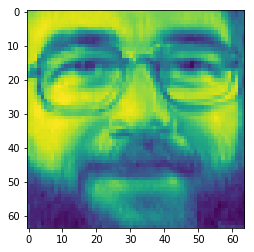

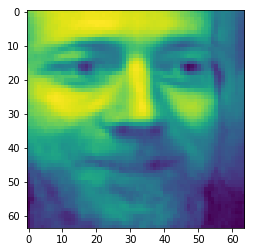

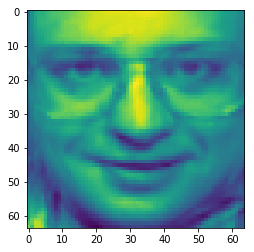

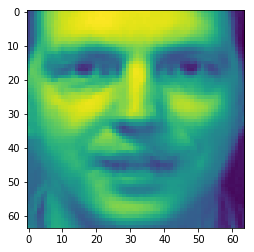

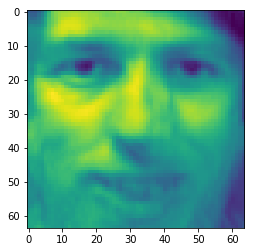

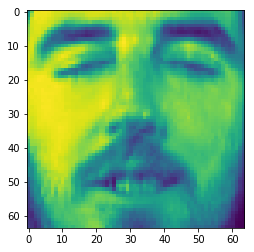

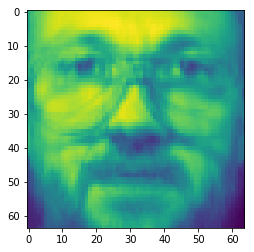

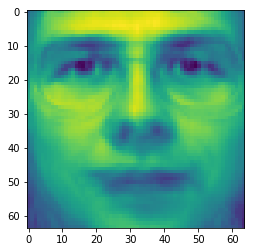

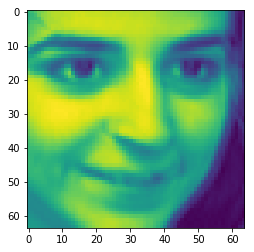

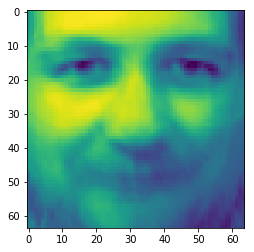

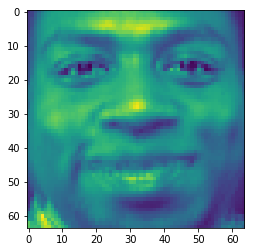

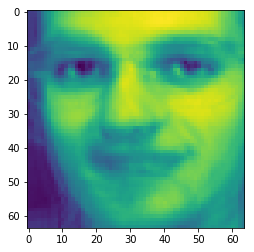

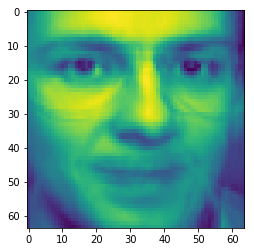

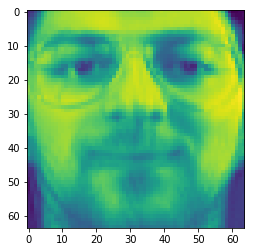

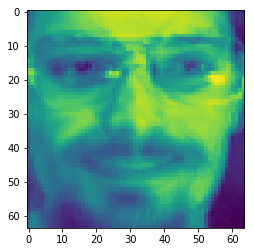

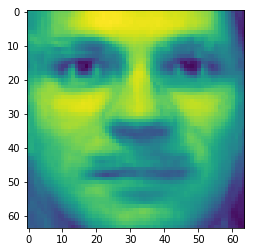

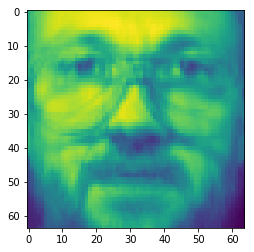

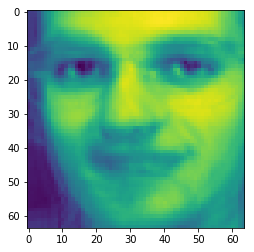

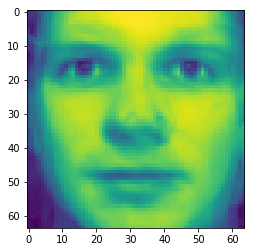

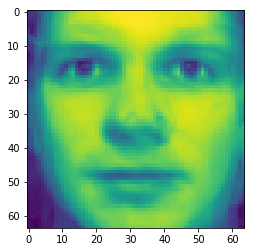

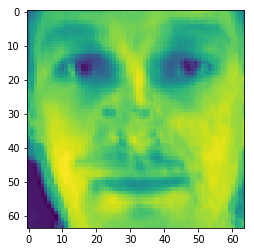

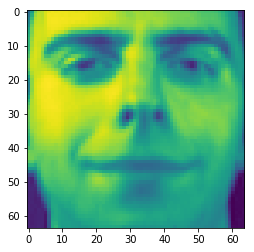

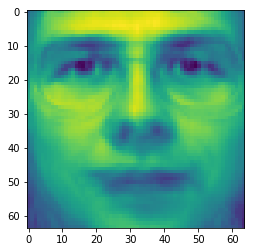

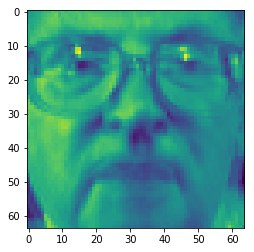

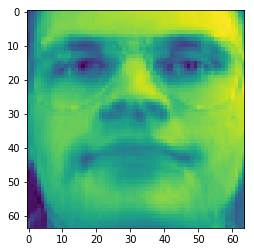

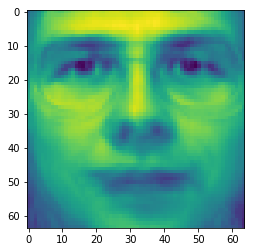

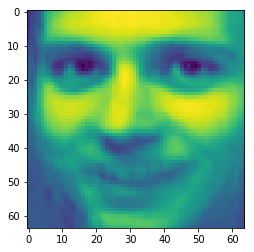

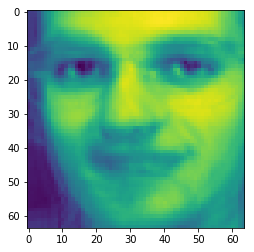

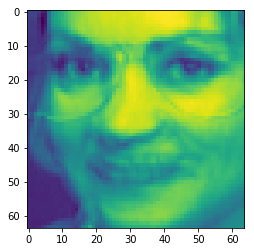

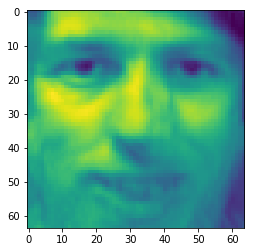

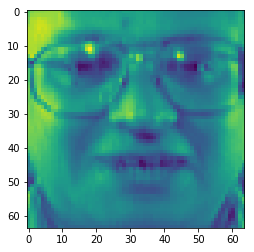

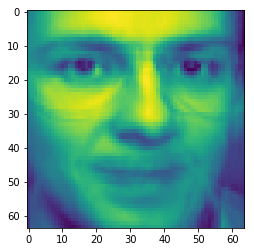

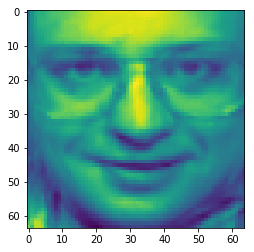

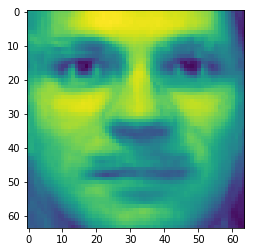

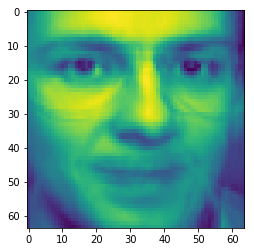

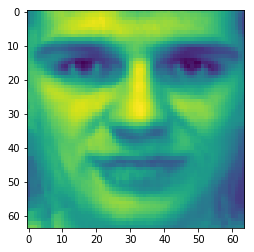

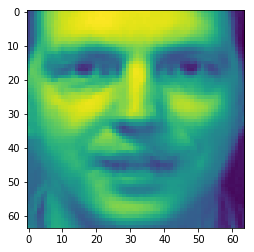

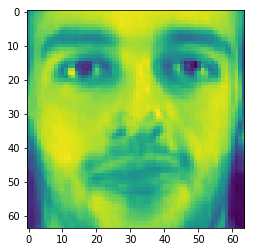

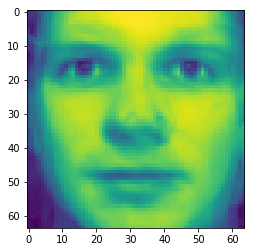

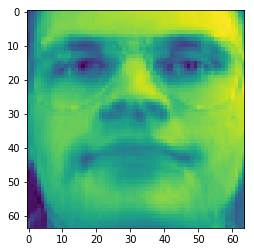

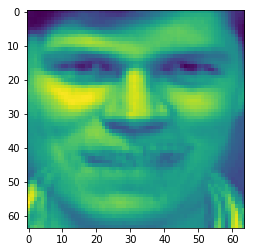

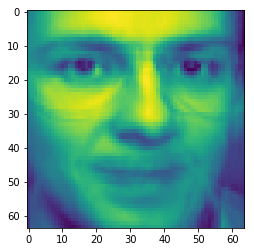

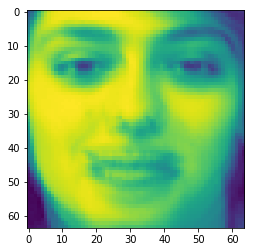

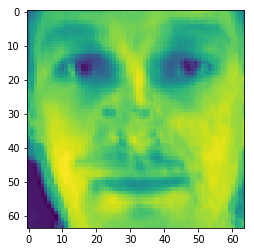

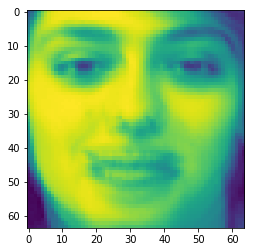

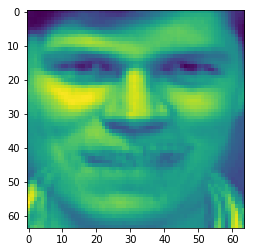

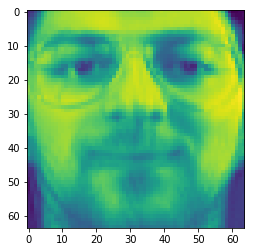

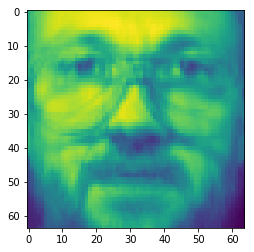

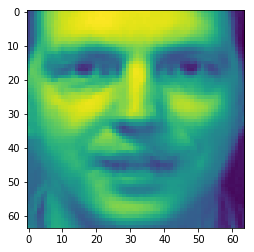

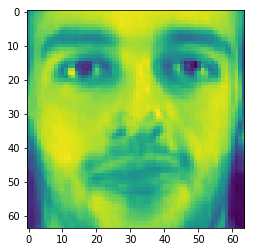

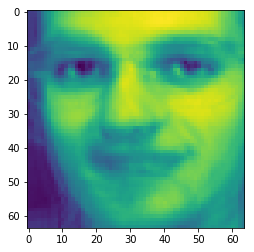

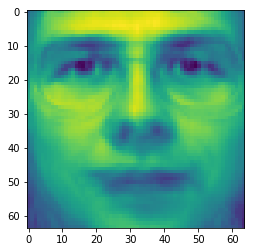

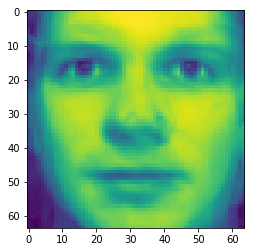

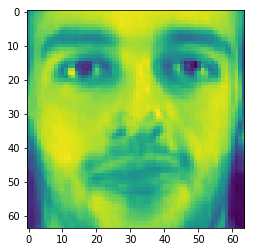

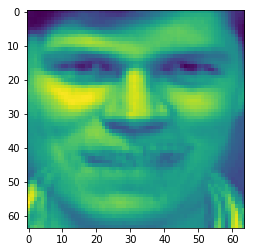

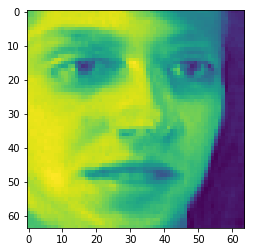

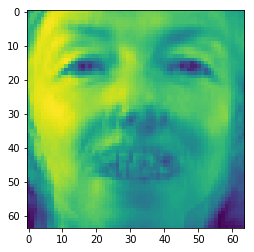

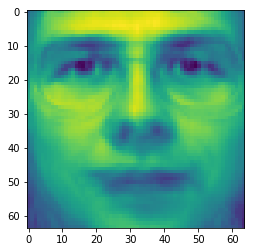

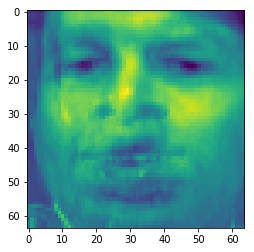

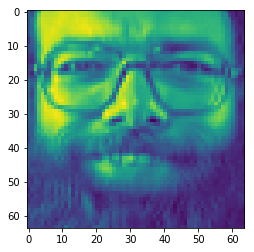

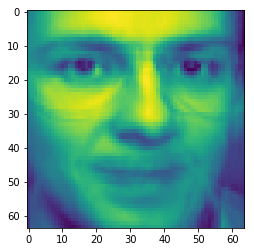

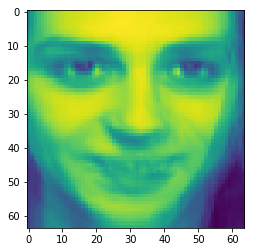

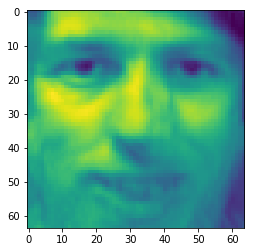

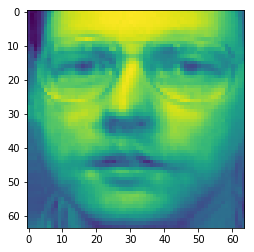

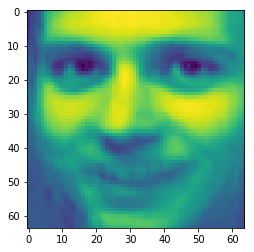

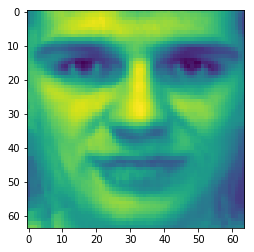

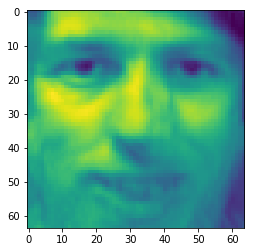

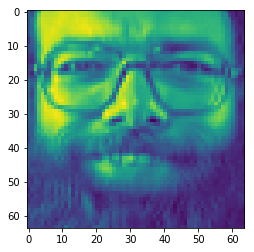

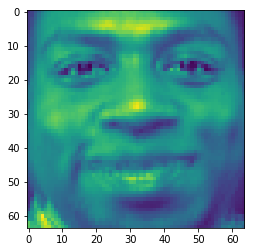

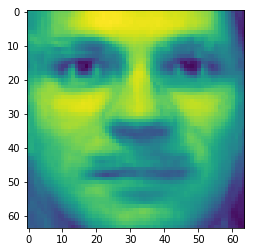

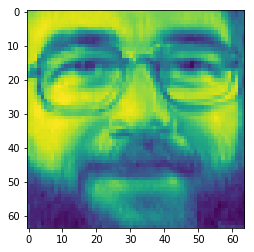

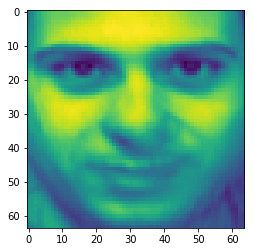

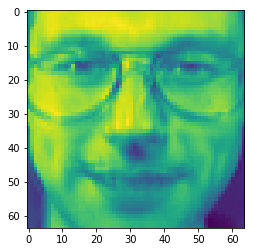

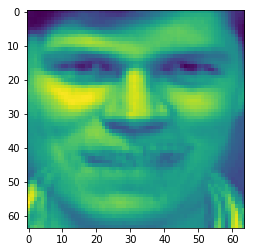

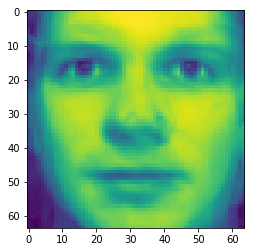

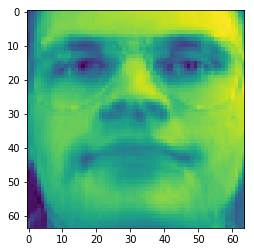

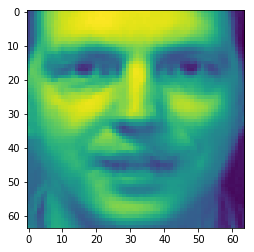

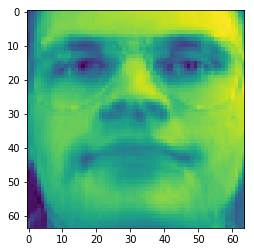

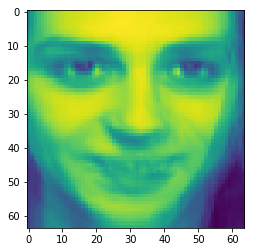

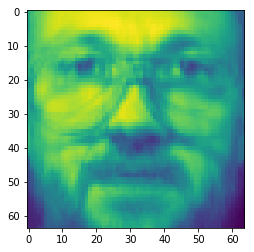

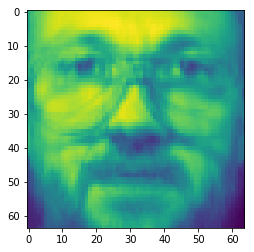

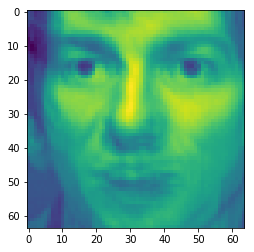

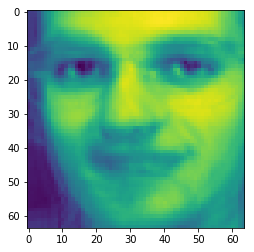

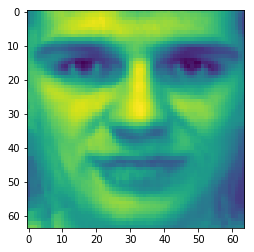

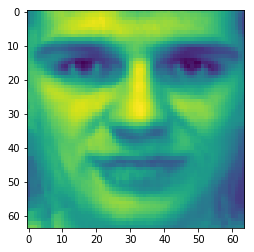

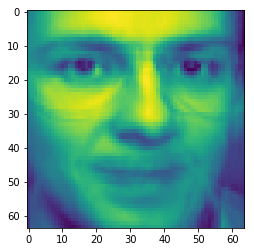

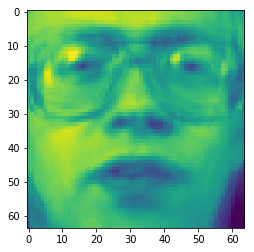

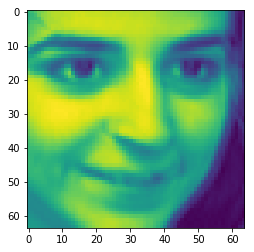

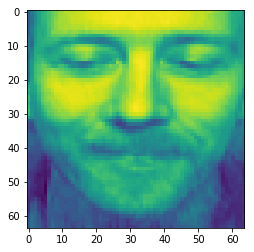

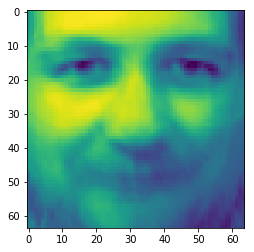

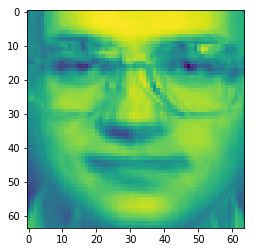

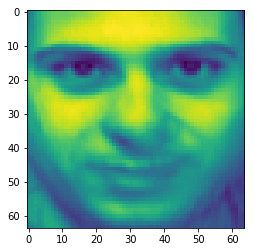

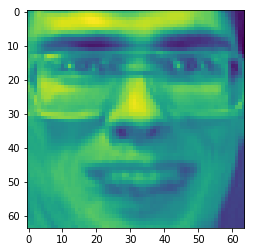

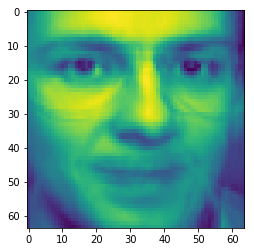

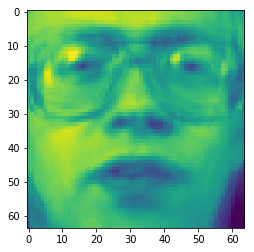

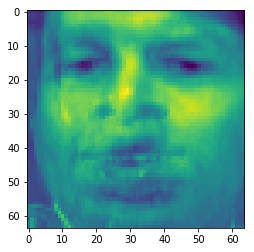

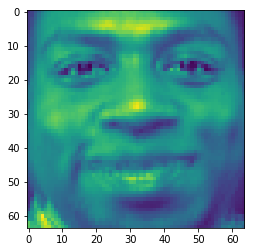

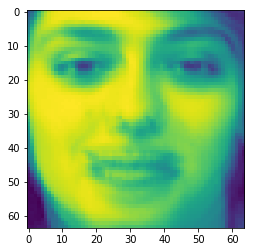

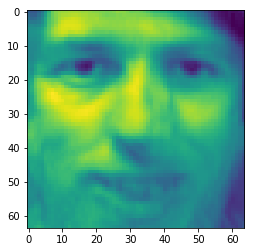

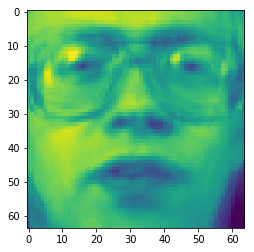

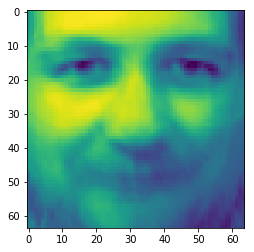

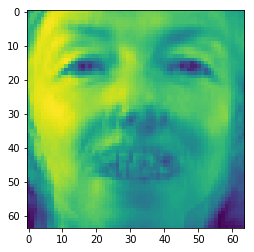

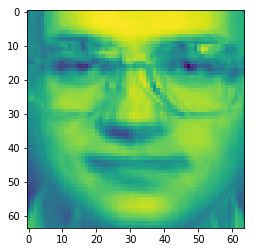

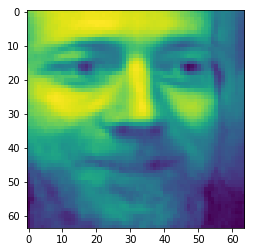

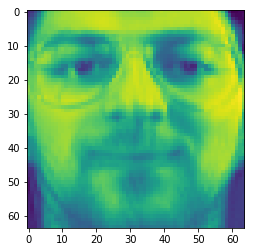

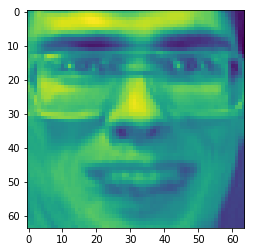

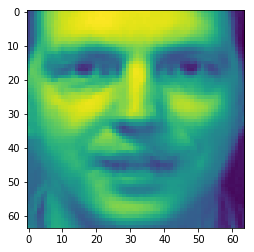

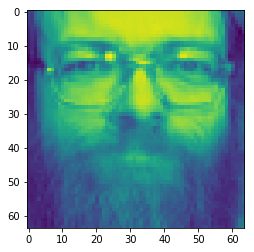

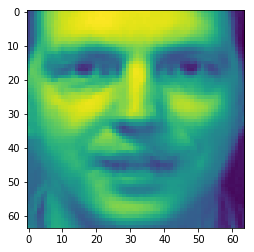

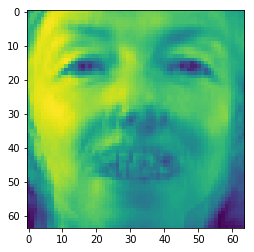

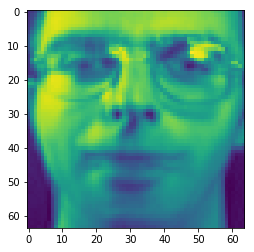

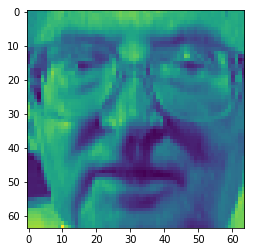

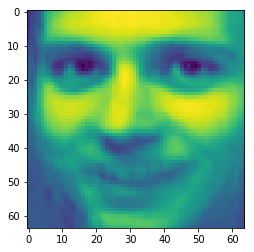

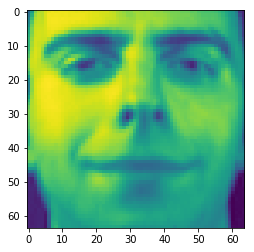

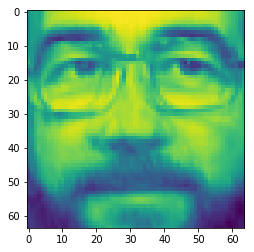

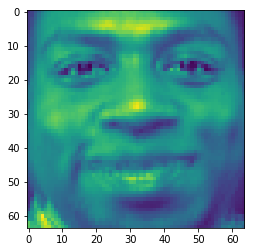

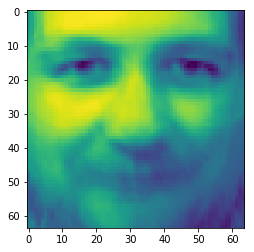

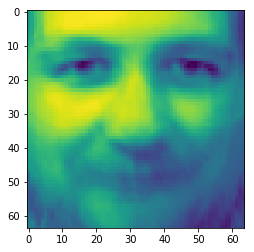

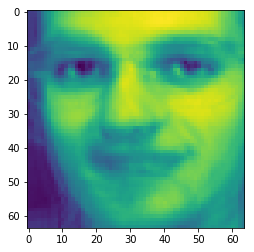

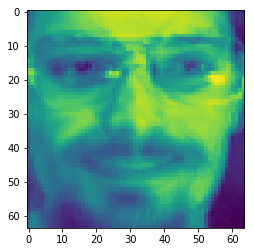

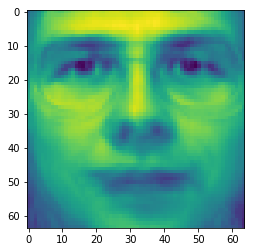

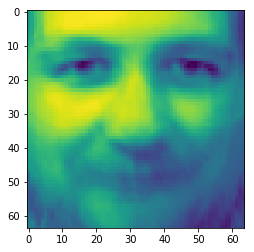

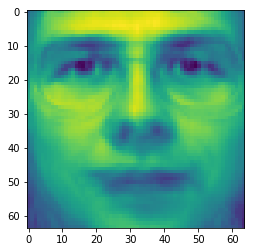

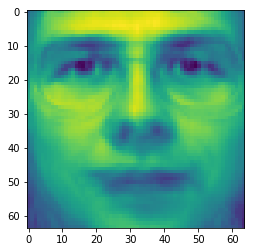

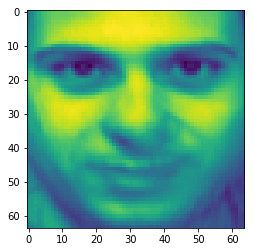

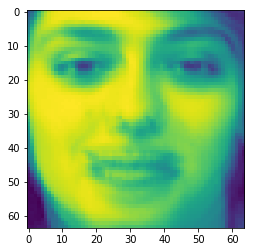

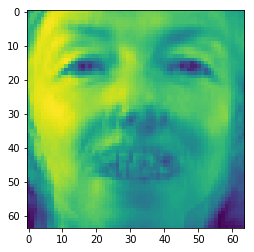

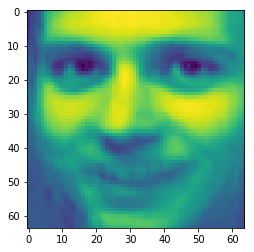

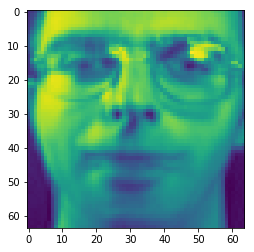

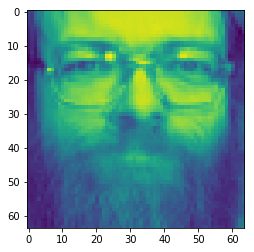

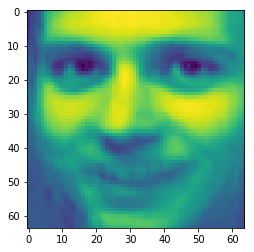

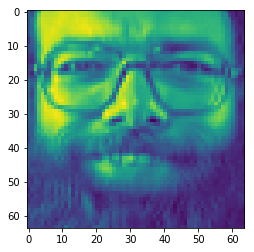

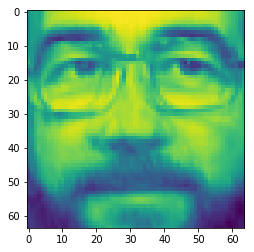

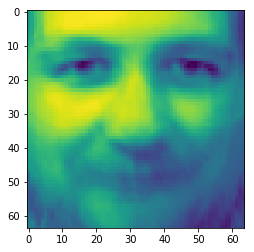

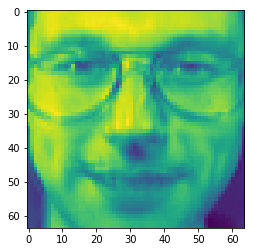

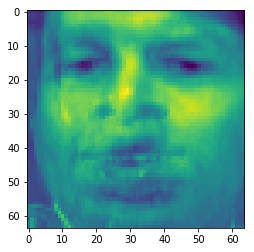

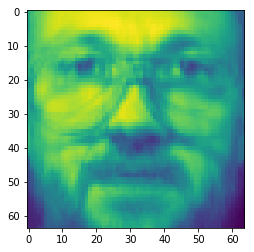

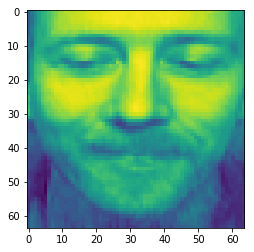

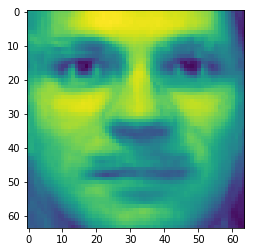

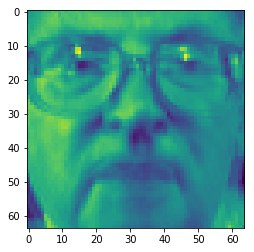

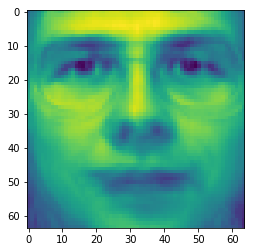

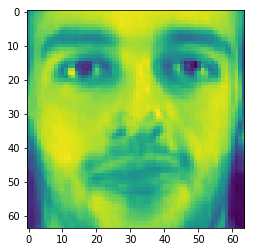

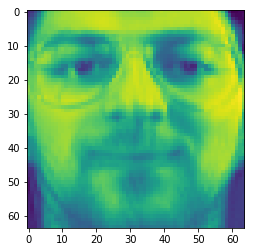

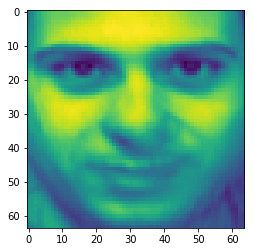

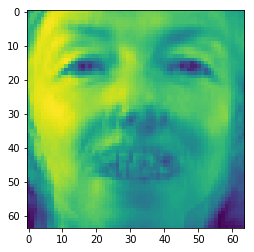

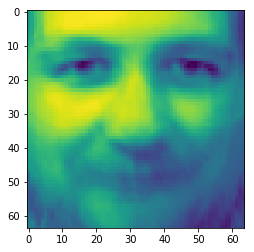

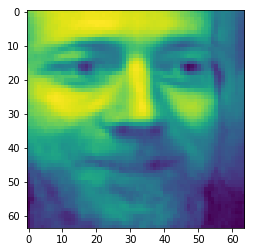

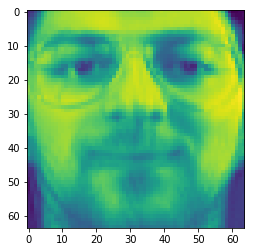

In [118]:
labels = cluster_x.cluster_centers_[cluster_x.labels_]
for i in range(len(labels)):
    plt.imshow(labels.reshape(labels.shape[0], 64, 64)[i])
    plt.show()

In [121]:
print(cluster_x.cluster_centers_.shape)

(50, 4096)


Clusters:  2
0.21223387
-13362.5693359375
Clusters:  3
0.12655677
-12477.875
Clusters:  4
0.109972484
-11741.8916015625
Clusters:  5
0.11031813
-11306.1318359375
Clusters:  6
0.10363775
-11018.9736328125
Clusters:  7
0.10590168
-10641.681640625
Clusters:  8
0.094958946
-10469.970703125
Clusters:  9
0.09337079
-10234.7822265625
Clusters:  10
0.10368763
-10048.603515625


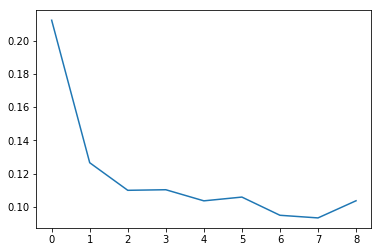

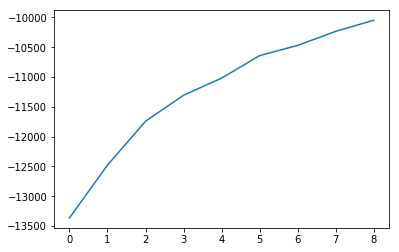

In [130]:
n_clusters = np.arange(9) + 2
sil_scores = []
elbow_scores = []

for k in n_clusters:
    print("Clusters: ", k)
    kmeans = KMeans(n_clusters=k)
    kmeans.fit_predict(states.reshape(states.shape[0], -1))
    sil_scores.append(silhouette_score(states.reshape(states.shape[0], -1), kmeans.labels_))
    elbow_scores.append(kmeans.score(states.reshape(states.shape[0], -1)))
    print(sil_scores[-1])
    print(elbow_scores[-1])
    
plt.plot(sil_scores)
plt.show()

plt.plot(elbow_scores)
plt.show()

In [134]:
clustered_states = KMeans(n_clusters=8).fit(states.reshape(states.shape[0], -1))

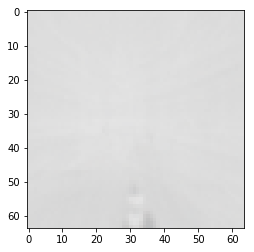

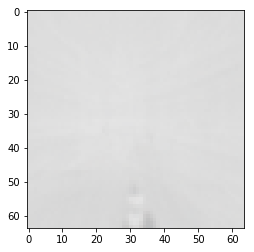

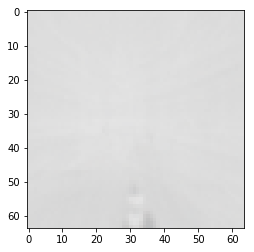

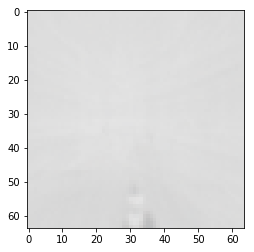

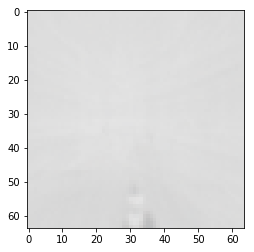

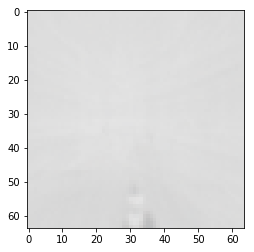

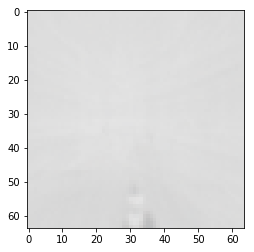

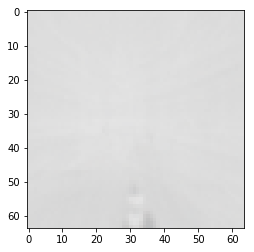

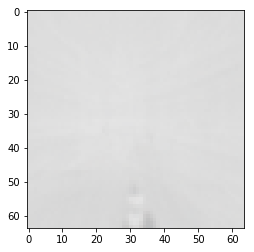

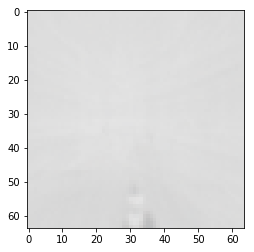

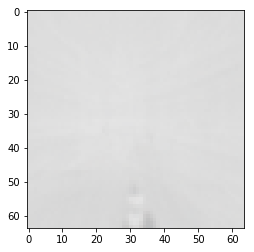

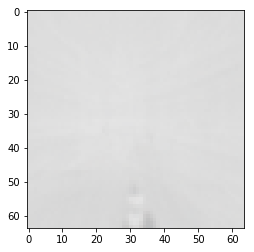

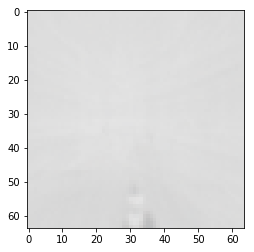

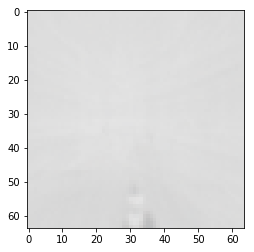

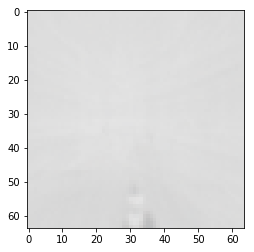

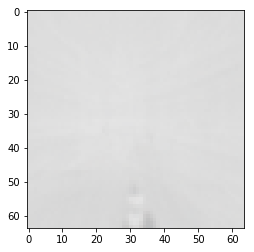

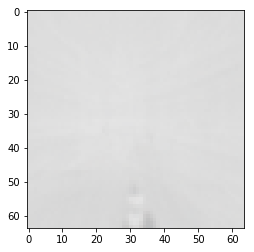

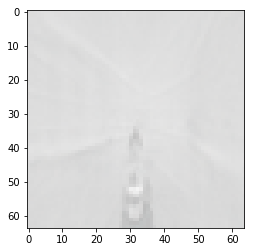

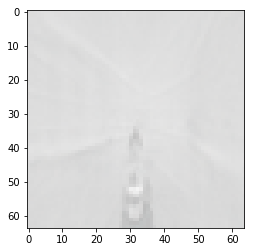

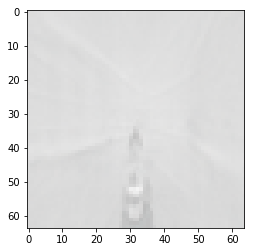

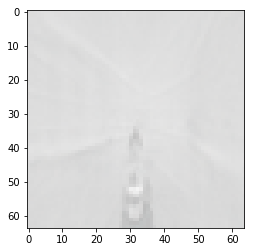

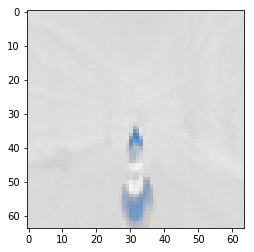

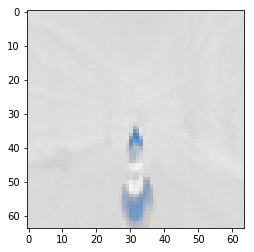

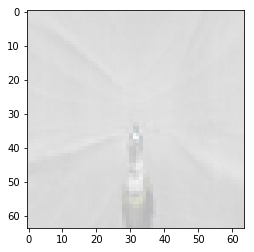

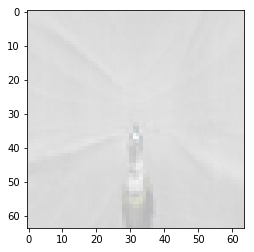

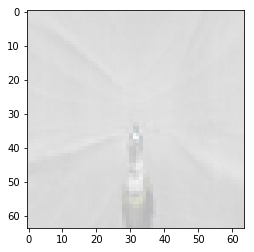

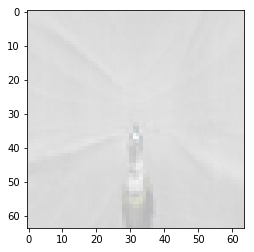

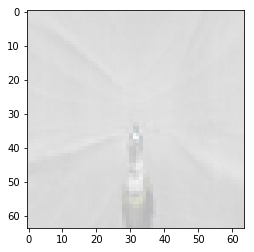

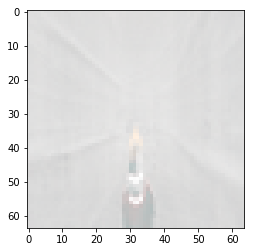

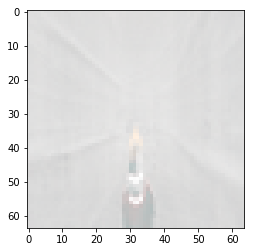

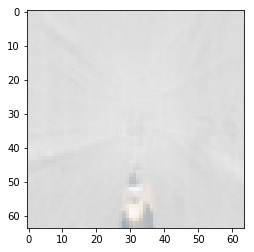

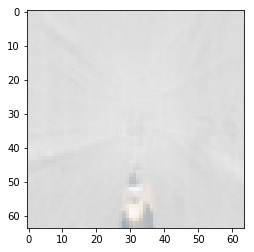

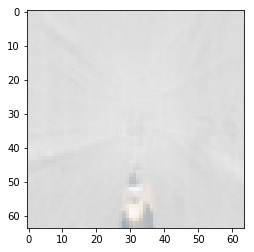

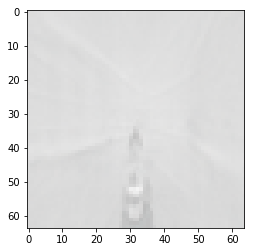

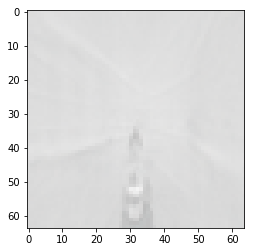

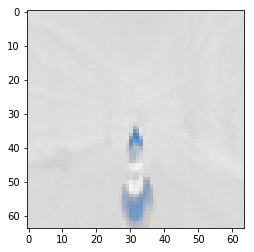

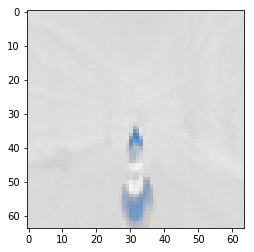

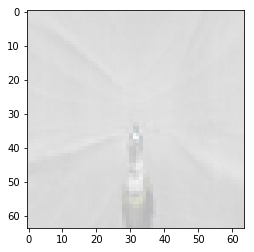

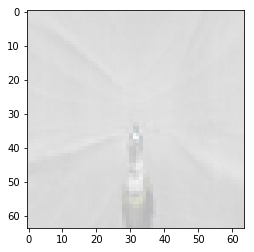

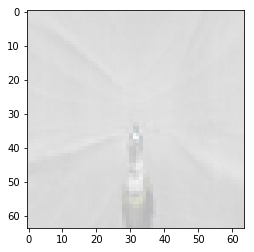

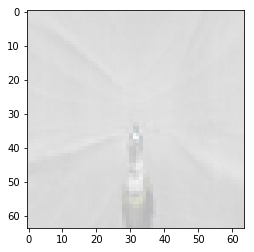

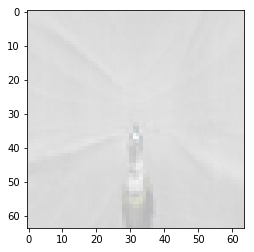

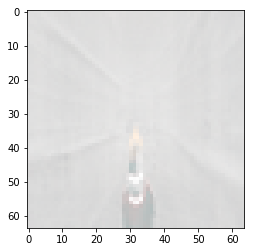

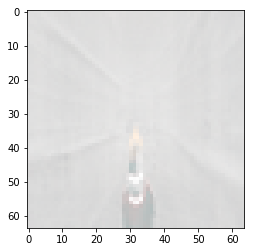

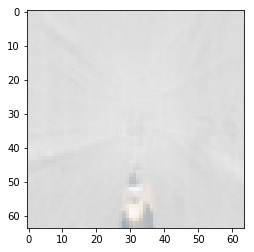

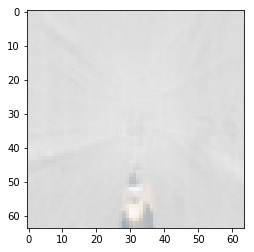

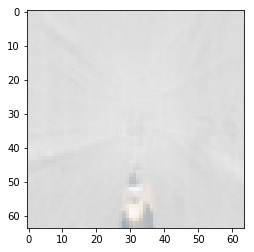

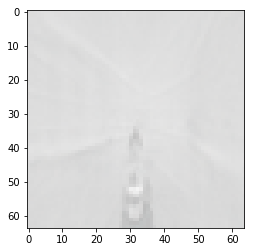

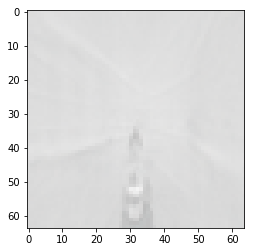

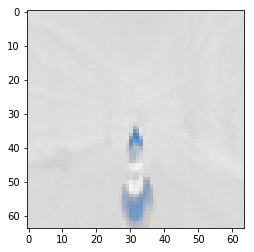

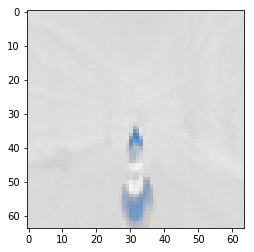

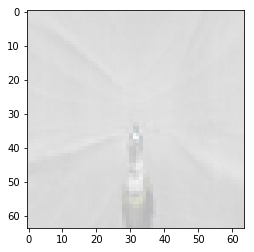

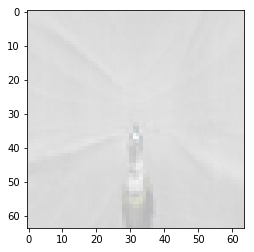

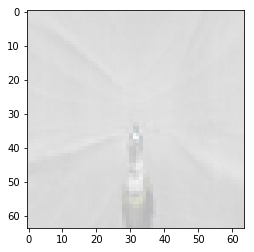

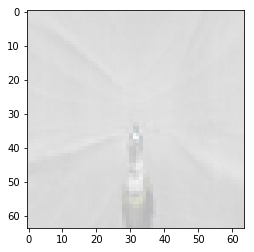

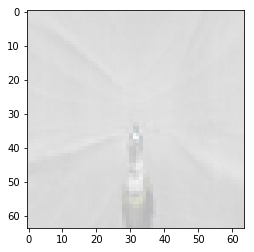

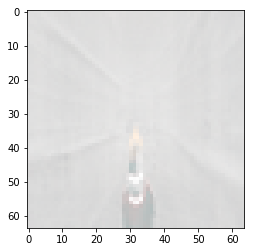

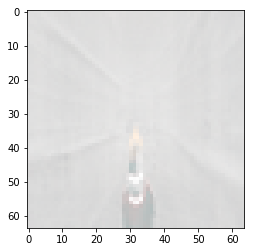

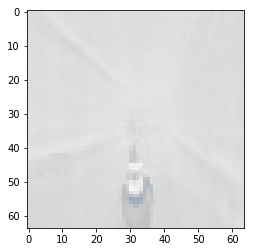

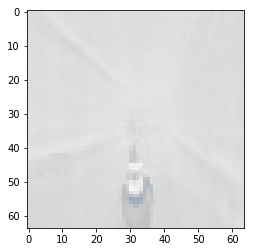

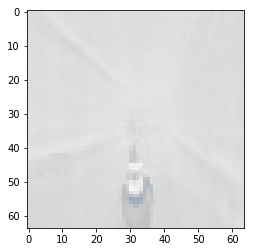

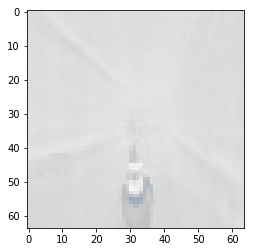

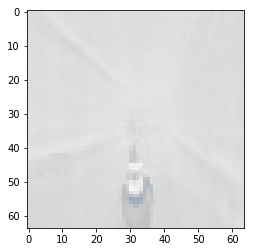

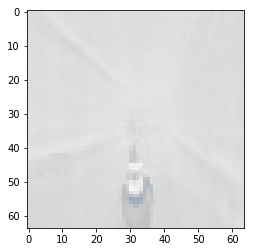

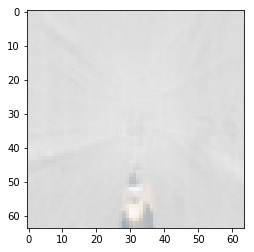

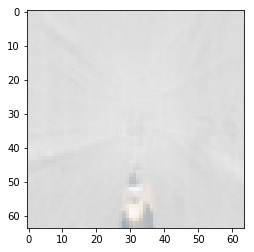

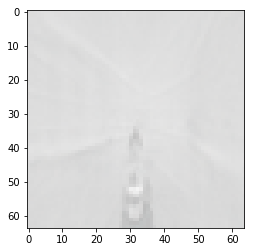

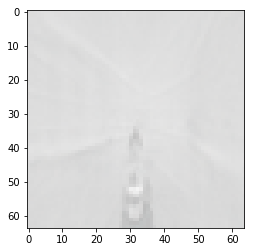

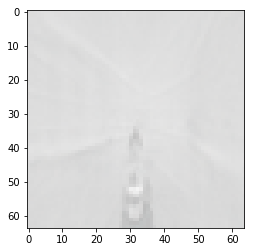

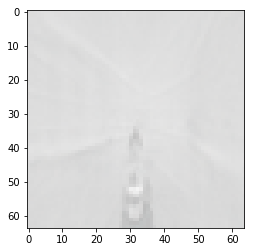

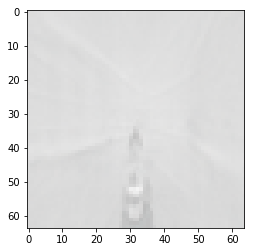

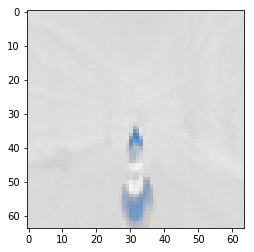

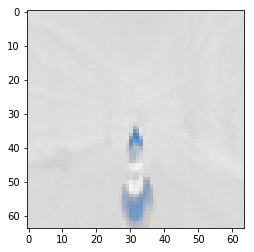

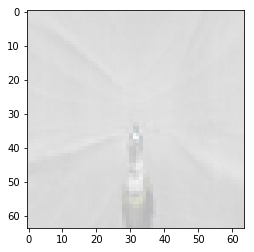

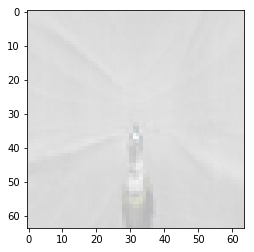

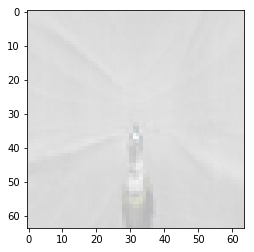

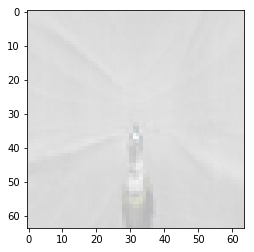

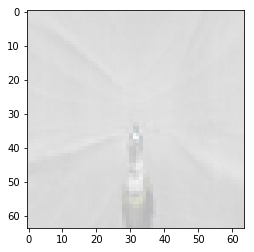

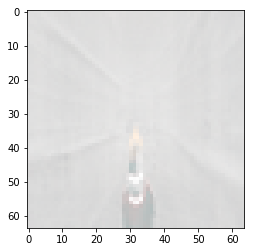

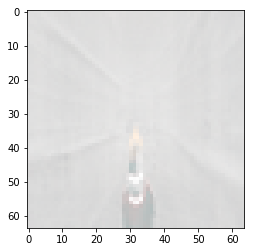

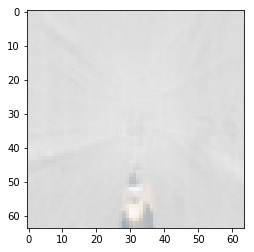

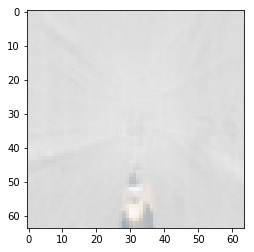

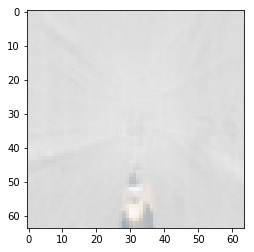

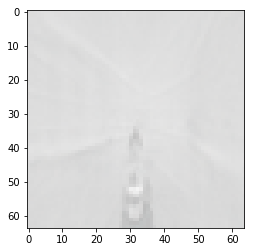

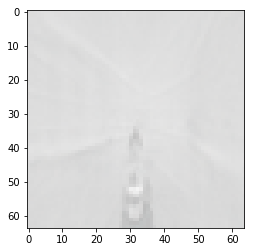

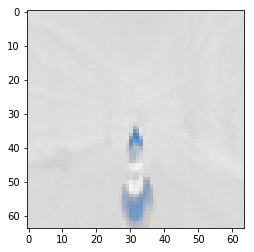

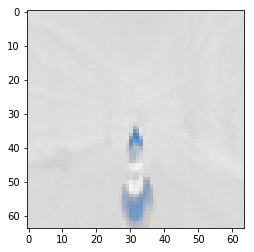

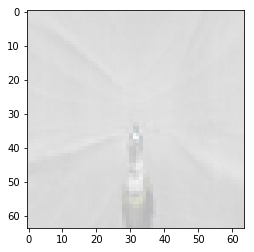

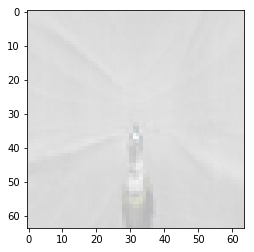

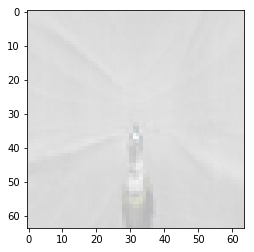

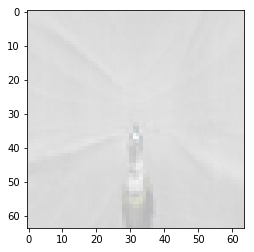

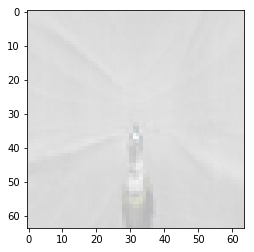

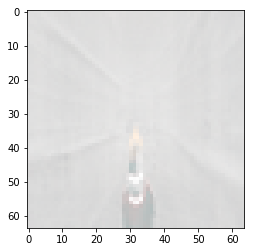

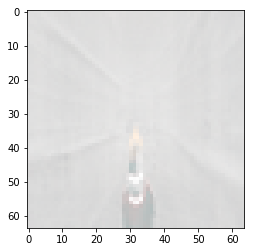

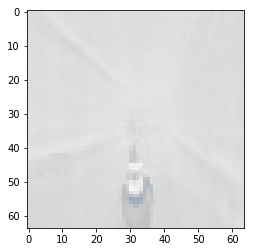

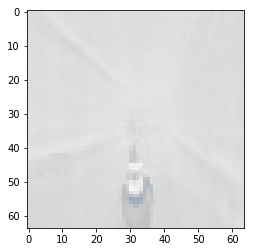

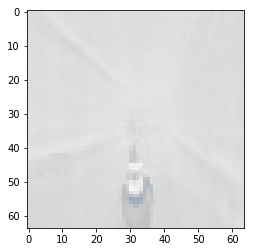

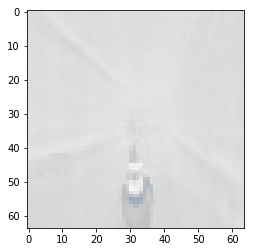

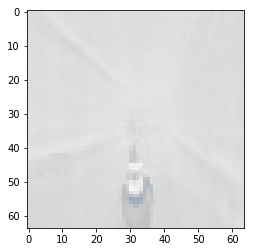

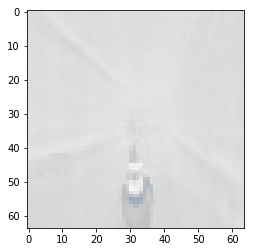

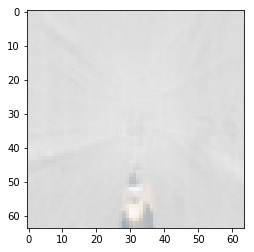

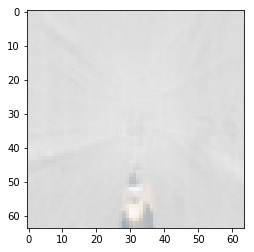

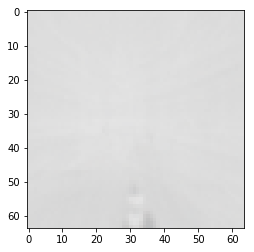

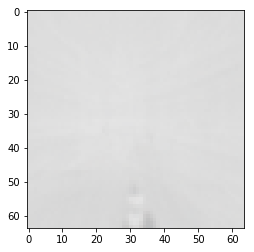

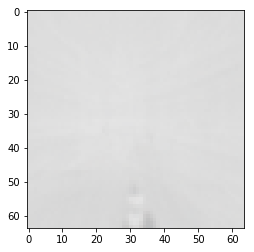

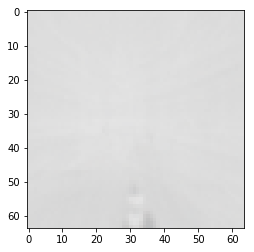

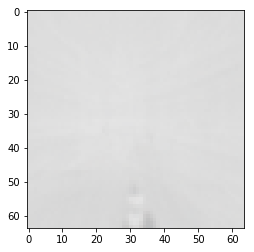

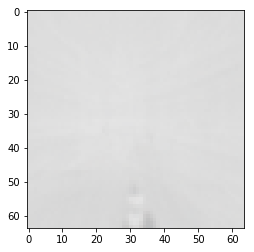

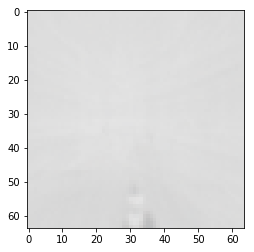

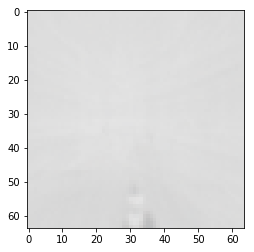

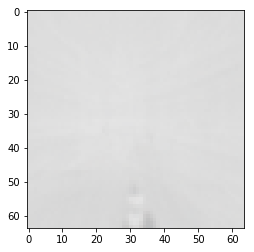

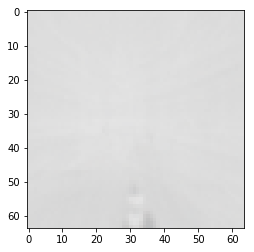

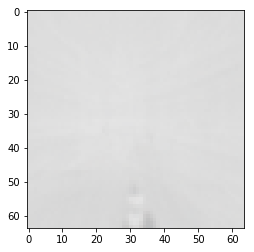

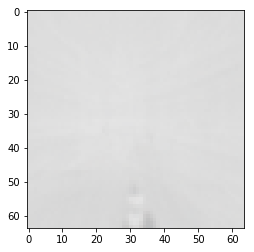

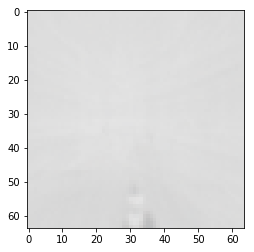

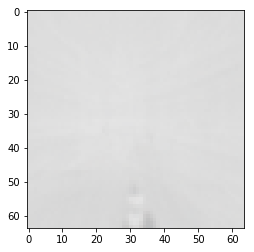

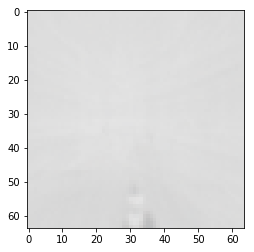

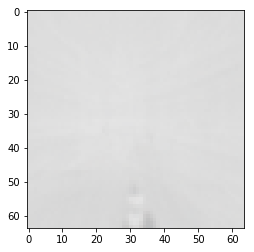

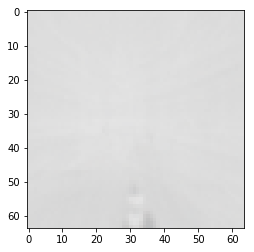

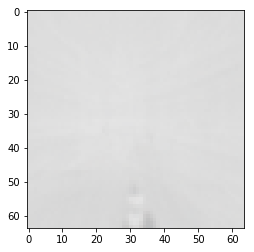

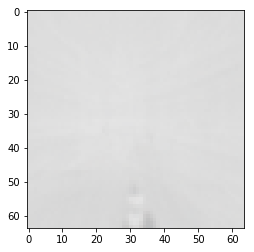

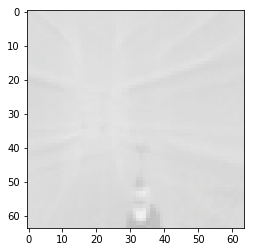

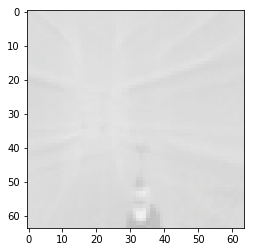

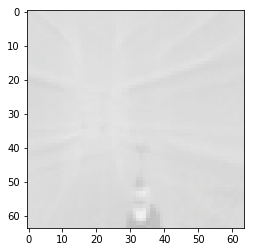

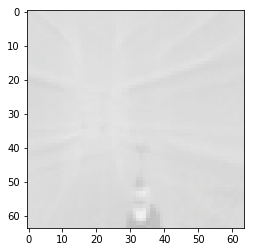

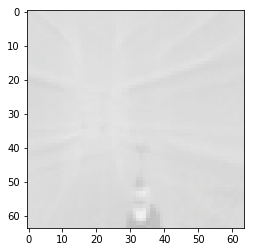

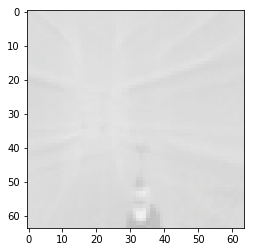

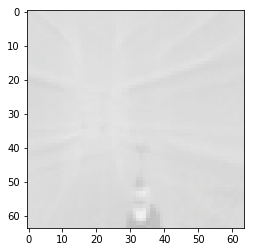

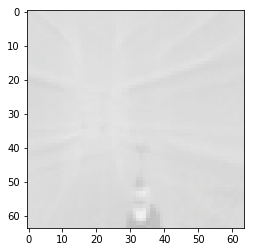

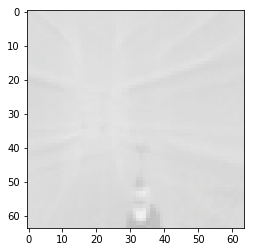

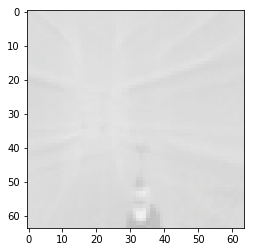

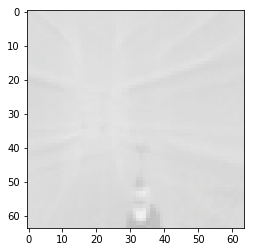

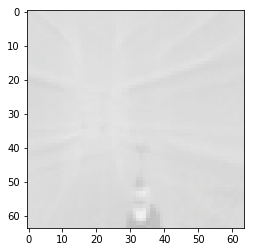

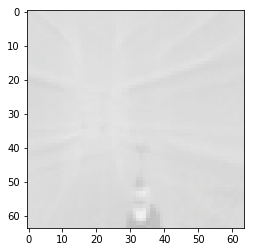

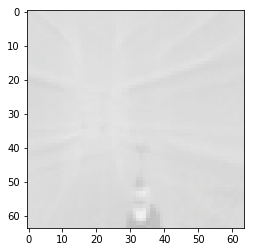

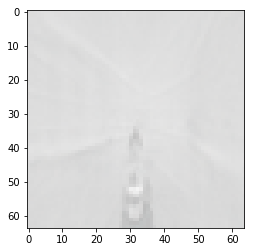

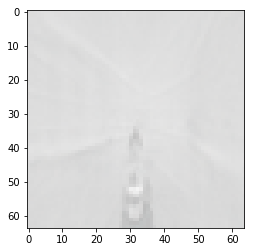

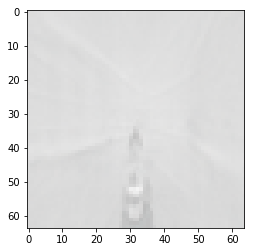

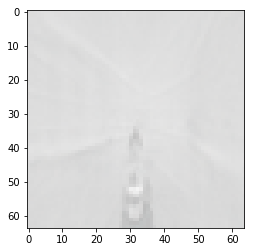

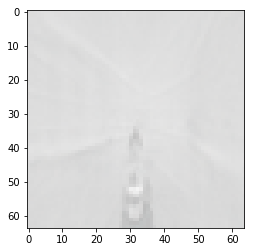

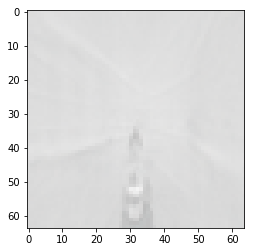

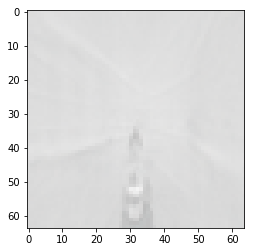

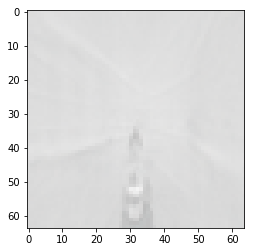

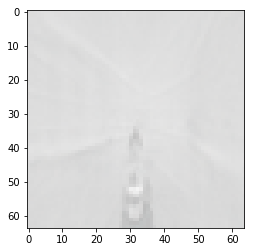

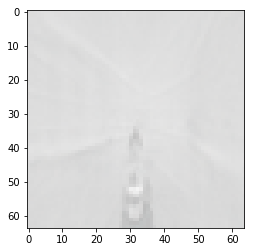

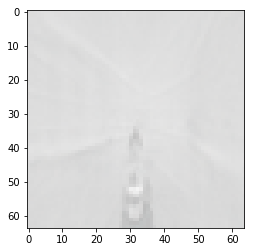

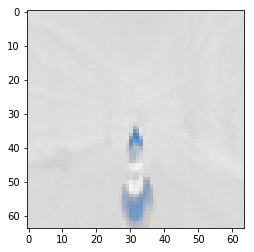

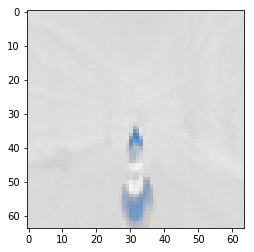

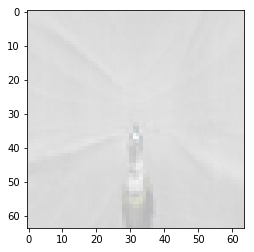

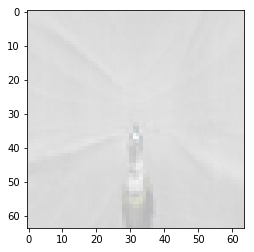

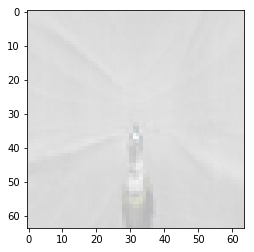

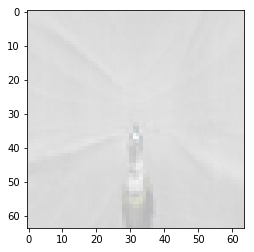

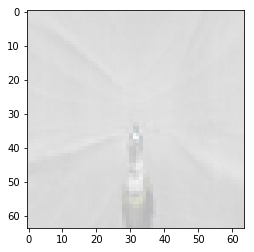

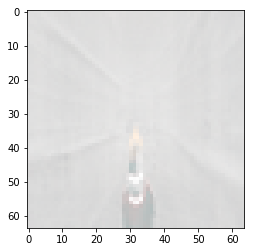

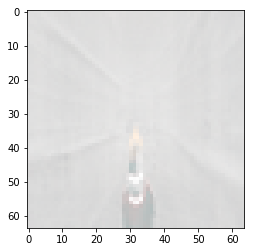

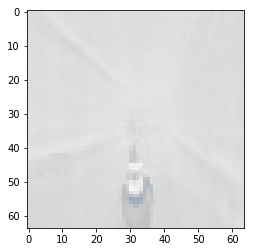

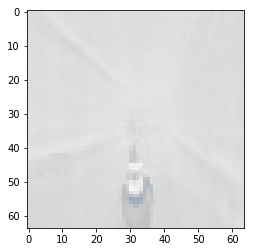

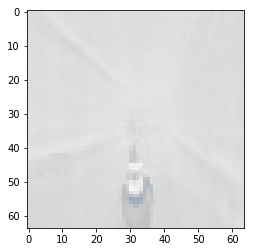

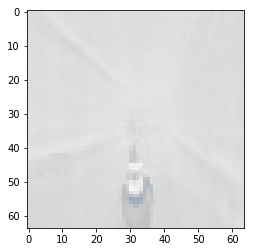

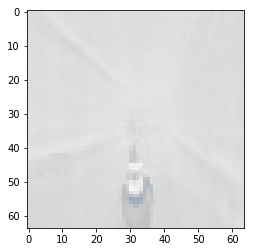

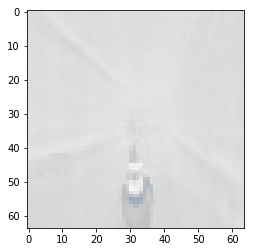

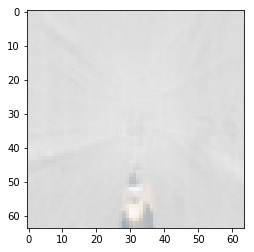

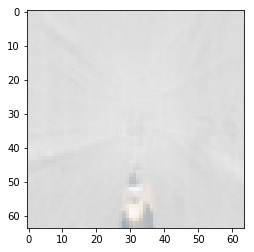

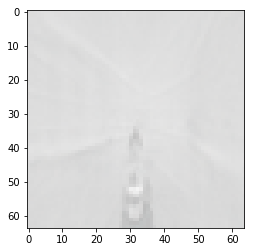

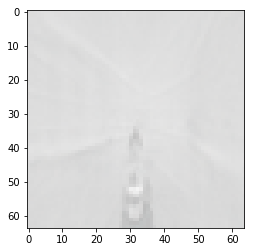

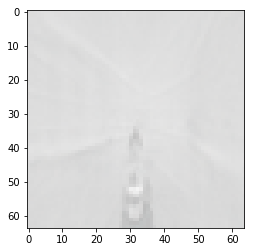

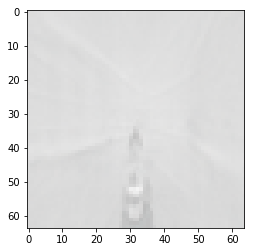

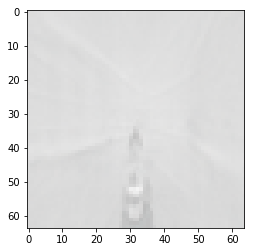

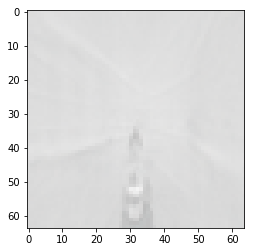

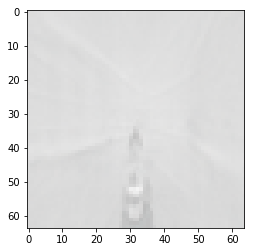

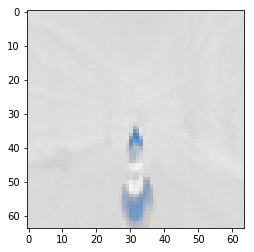

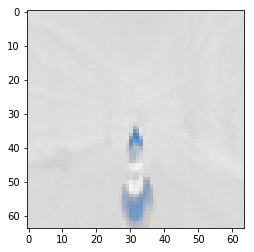

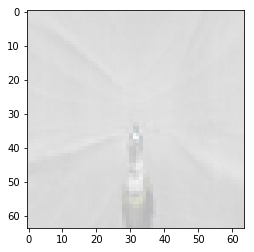

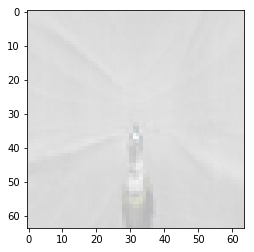

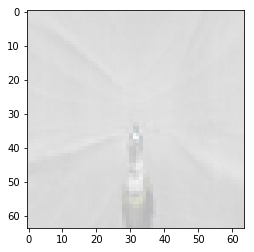

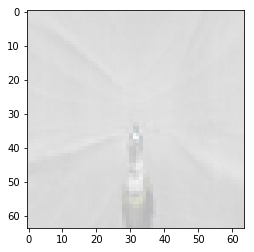

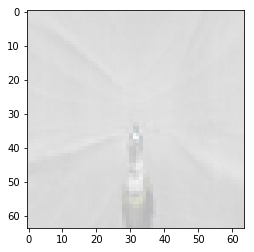

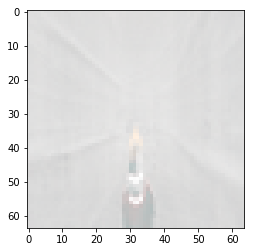

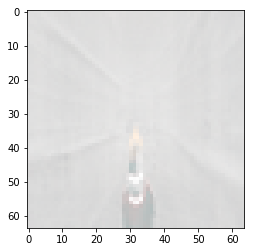

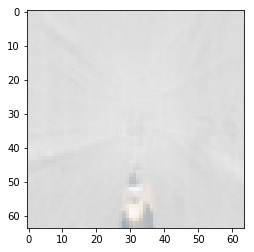

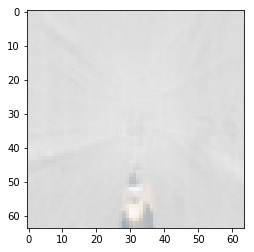

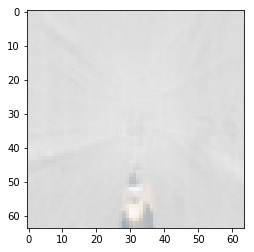

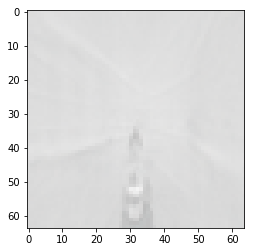

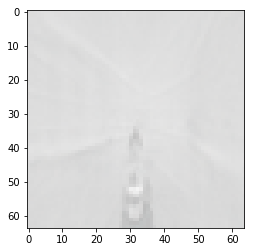

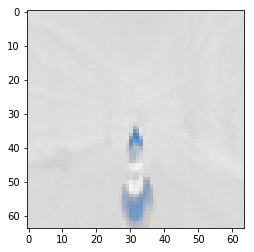

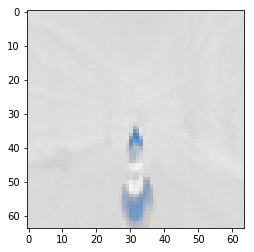

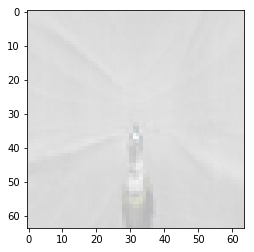

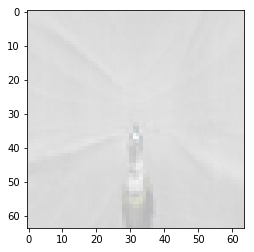

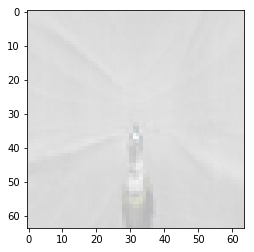

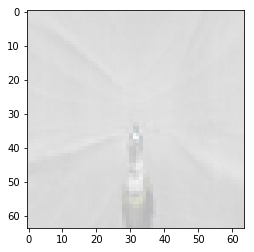

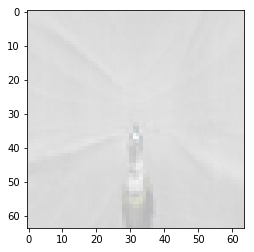

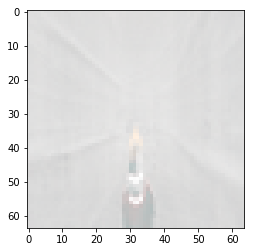

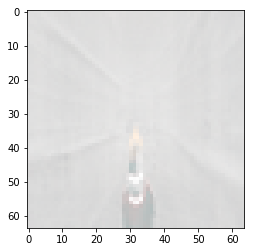

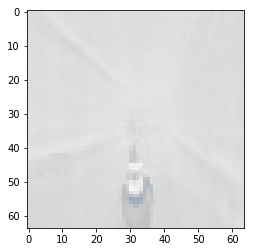

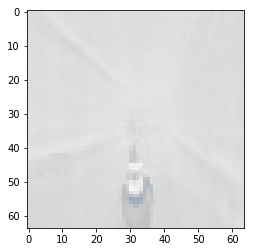

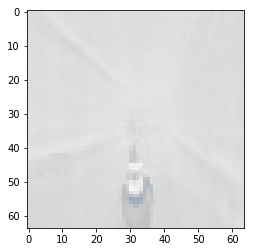

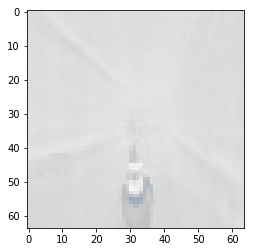

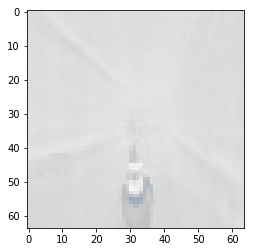

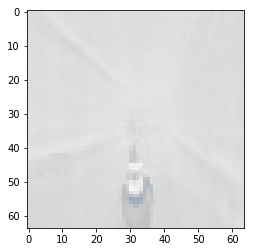

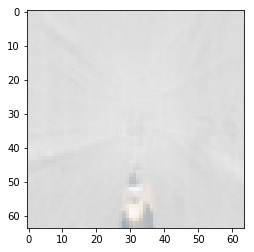

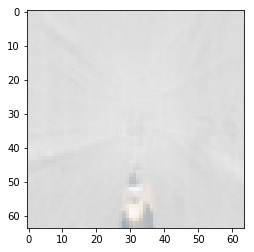

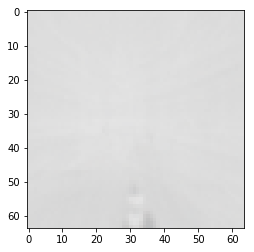

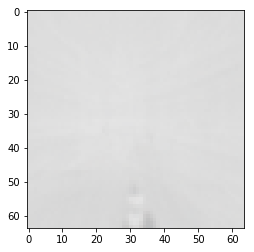

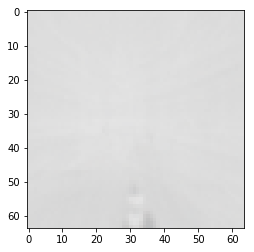

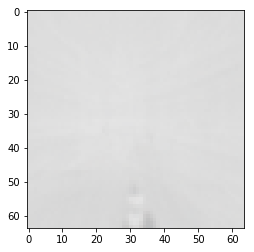

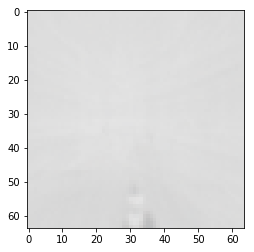

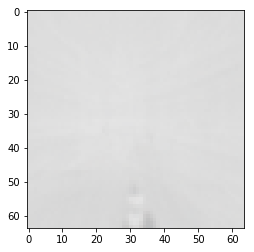

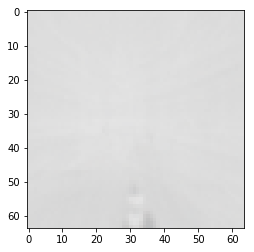

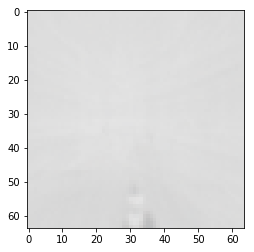

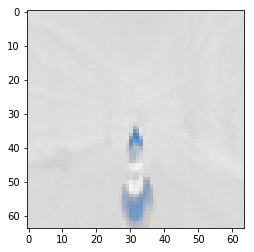

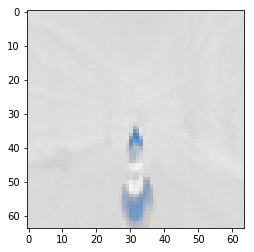

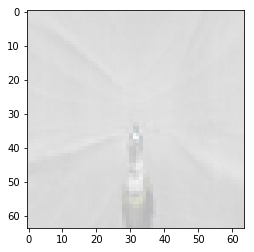

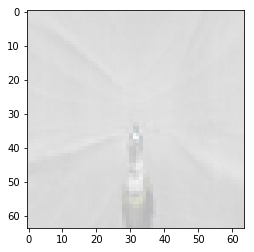

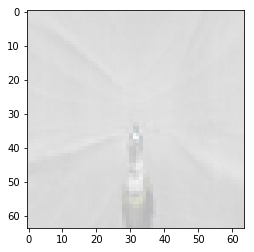

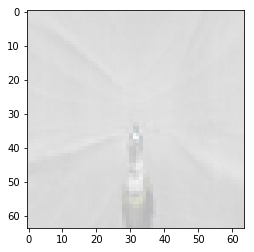

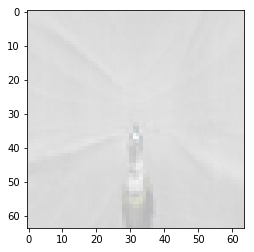

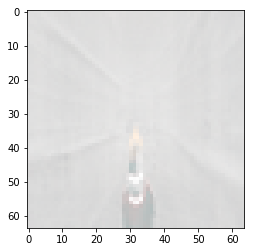

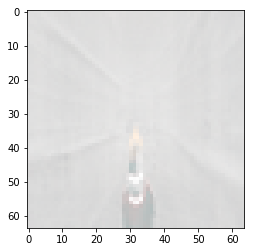

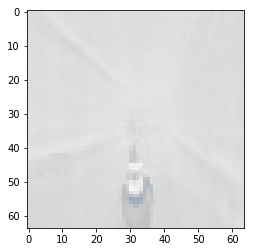

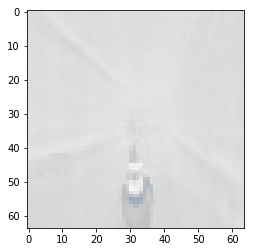

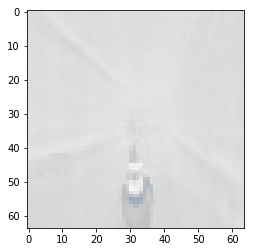

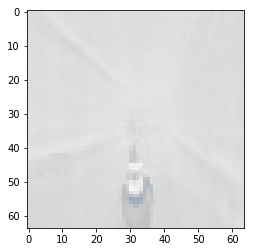

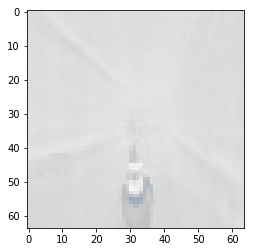

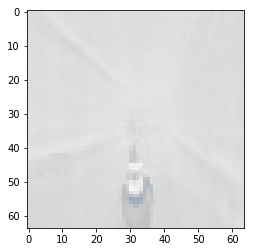

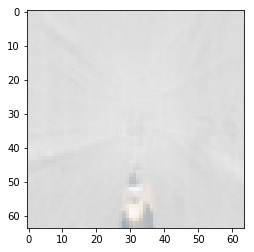

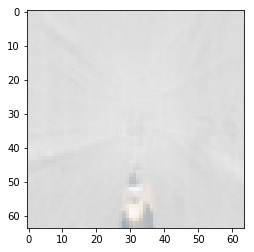

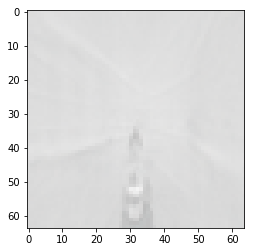

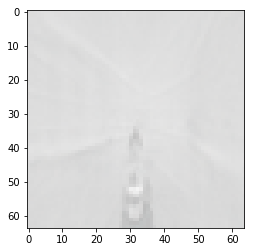

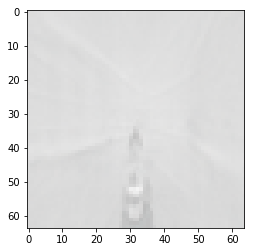

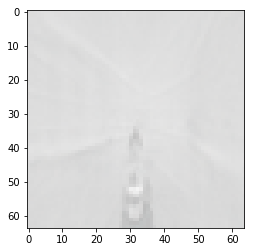

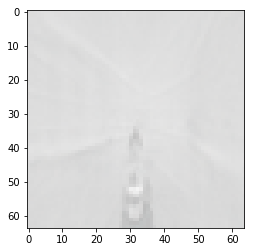

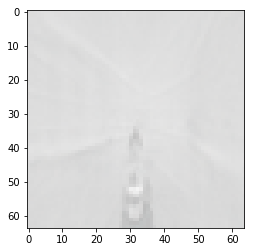

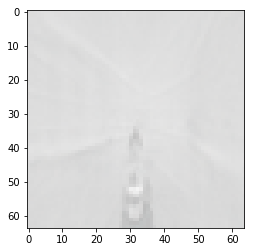

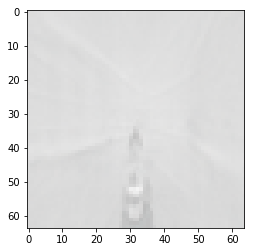

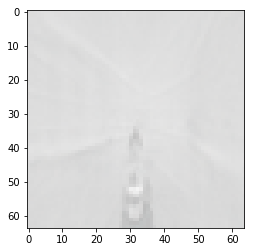

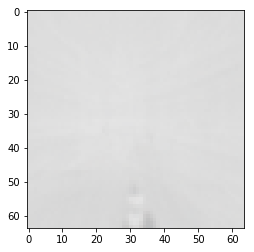

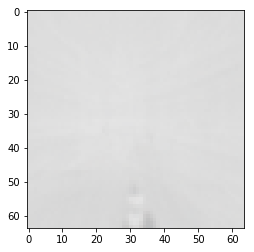

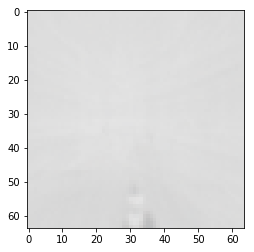

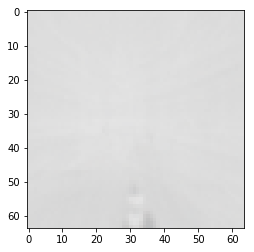

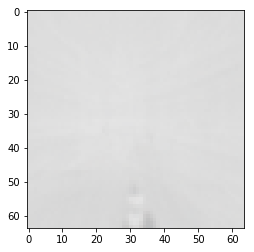

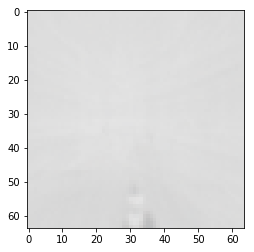

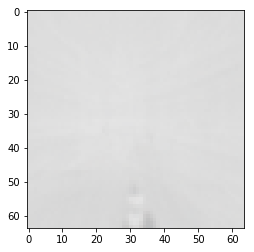

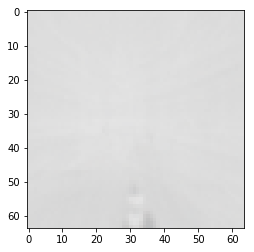

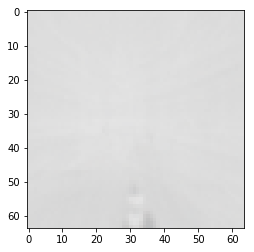

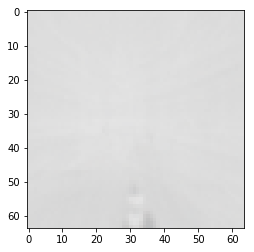

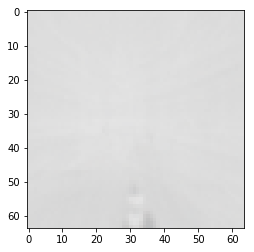

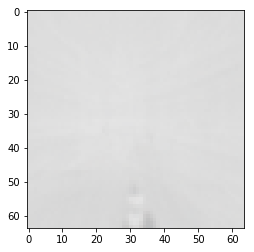

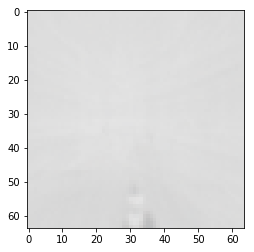

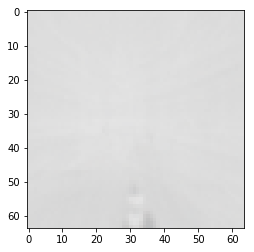

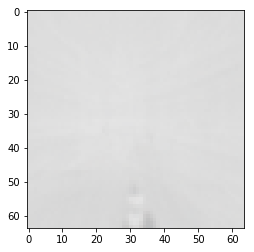

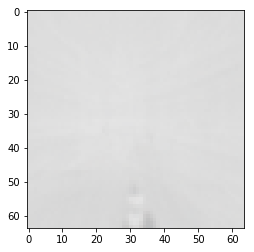

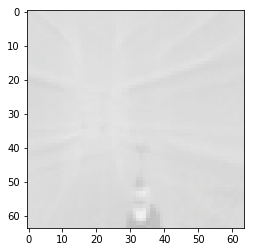

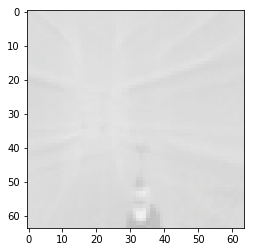

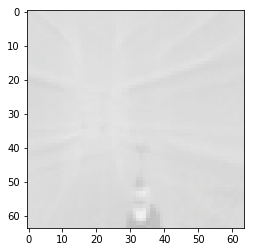

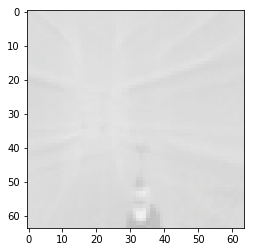

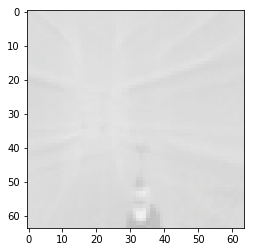

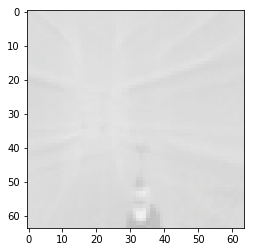

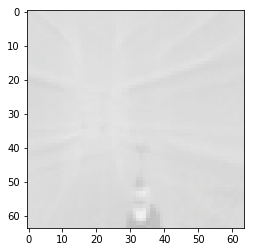

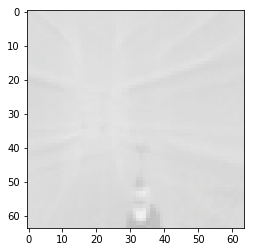

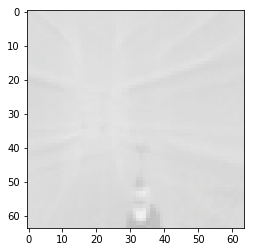

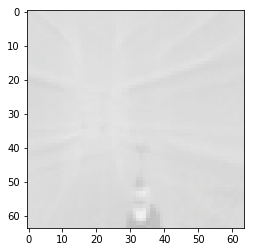

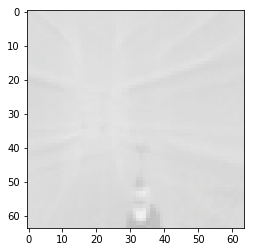

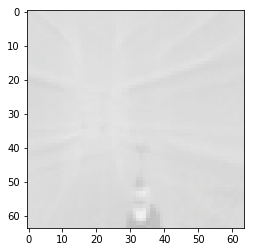

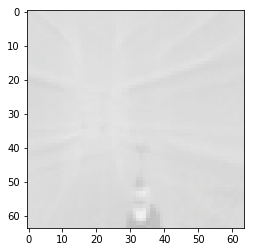

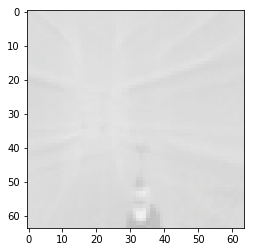

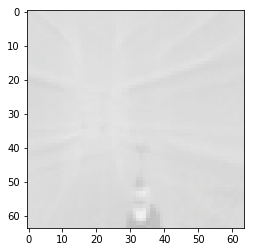

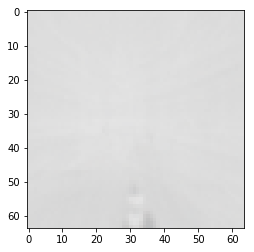

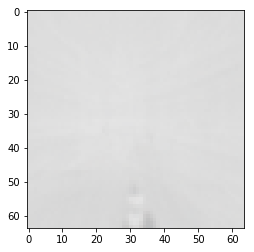

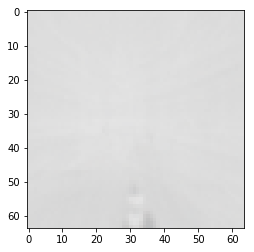

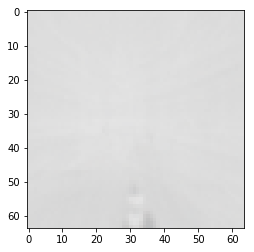

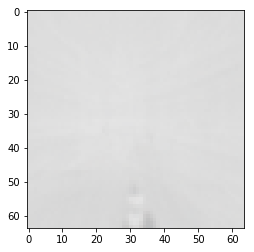

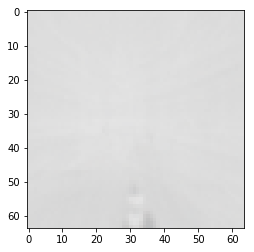

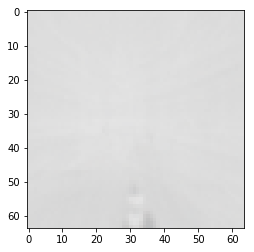

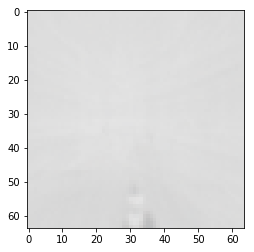

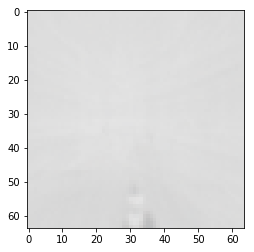

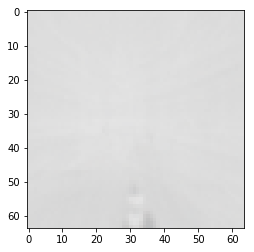

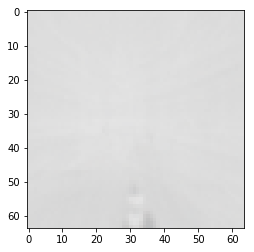

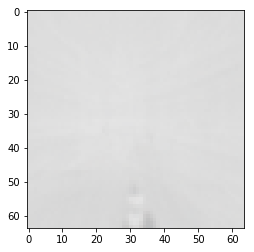

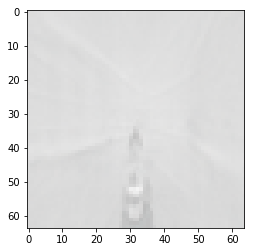

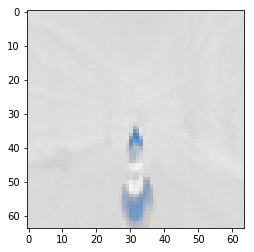

In [135]:
cluster_state_labels = clustered_states.cluster_centers_[clustered_states.labels_]
for i in range(len(labels)):
    plt.imshow(cluster_state_labels.reshape(cluster_state_labels.shape[0], 64, 64, 4)[i])
    plt.show()

In [149]:
state_tsne = tsne.fit_transform(cluster_state_labels)

16.910286


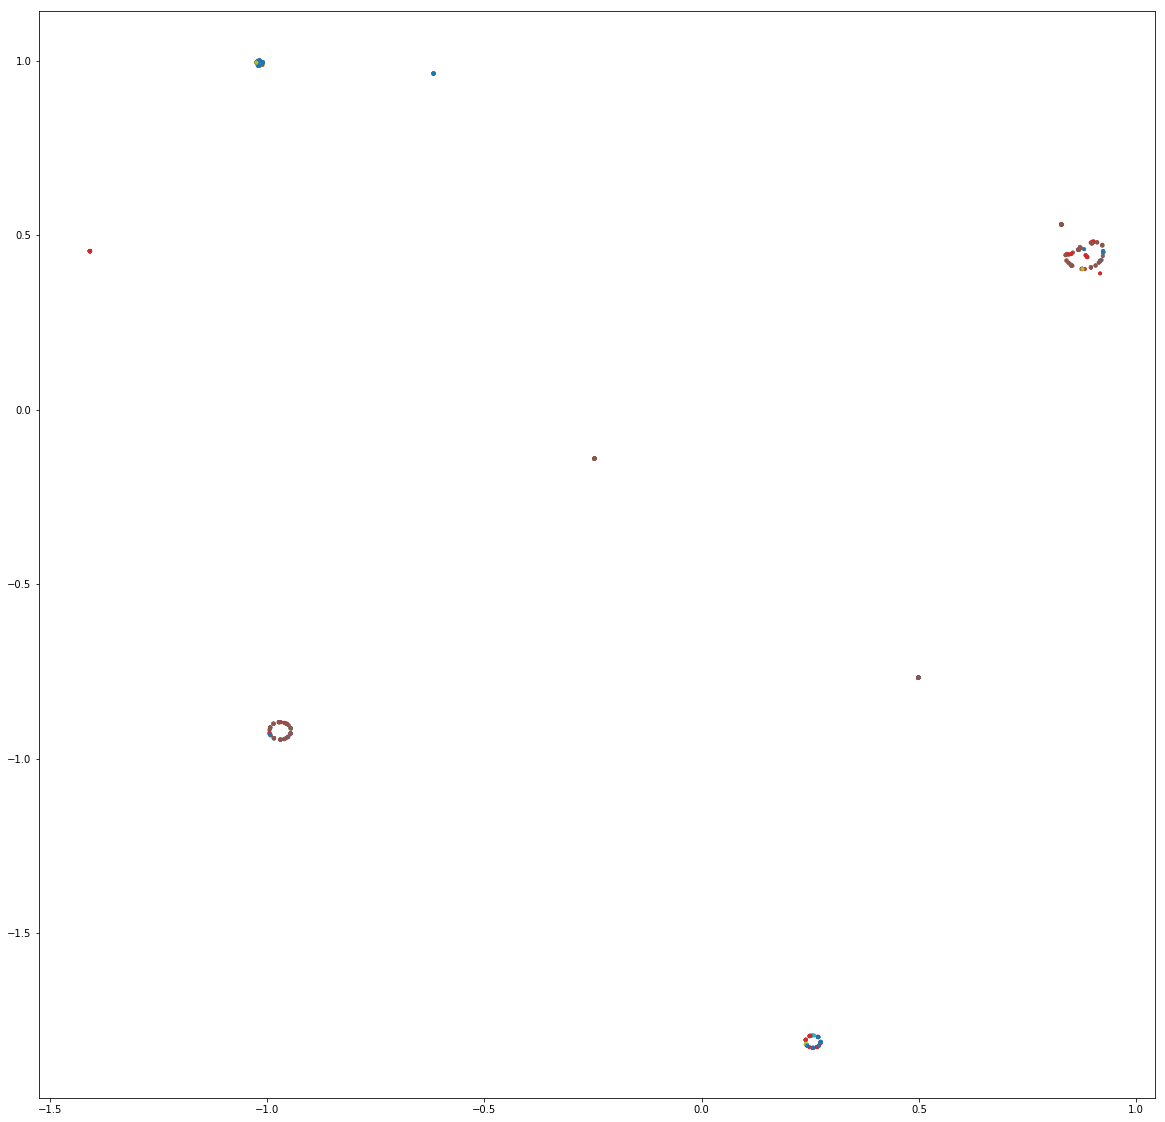

In [150]:
print(np.max(state_tsne))
plt.scatter(state_tsne[:, 0] / np.max(state_tsne), state_tsne[:, 1] / np.max(state_tsne), c=[np.argmax(x) for x in actions], s=10, cmap="tab10")
plt.show()